In [1]:
pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=befff86c9af403bbadaf702cbf7a8adc0568d1bea0d3f2552844c991aad6f923
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 9.3 MB/s eta 0:00:00


In [3]:
# Import library
import warnings
warnings.filterwarnings('ignore')

# for manipulation data (processing)
import pandas as pd
import numpy as np
import ppscore as pps
import datetime as dt
from datetime import date
from datetime import datetime as dt

# for visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import plotly.express as px

# for machine learning
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_auc_score

# for visualization of feature importance
import shap

#**Import Dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset = '/content/drive/MyDrive/Mini Project & VIX/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx'

df = pd.read_excel(dataset)

df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


#**Data Preprocessing**

In [6]:
df.shape

(287, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [8]:
df.columns

Index(['Username', 'EnterpriseID', 'StatusPernikahan', 'JenisKelamin',
       'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
       'AsalDaerah', 'HiringPlatform', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'NomorHP',
       'Email', 'TingkatPendidikan', 'PernahBekerja', 'IkutProgramLOP',
       'AlasanResign', 'TanggalLahir', 'TanggalHiring',
       'TanggalPenilaianKaryawan', 'TanggalResign'],
      dtype='object')

###**Handling Duplicated Data**

In [9]:
print(df.duplicated().sum())

0


In [10]:
#Check duplikat data pada kolom username
df['Username'].duplicated().sum()

2

In [11]:
# Menghapus duplikat data pada kolom username
df.drop_duplicates(subset=['Username'], inplace=True)

# Print jumlah duplikat setelah dihapus
print(df['Username'].duplicated().sum())

0


In [12]:
# Displays the results of changes
print(df['PernahBekerja'])

0      1
1      1
2      1
3      1
4      1
      ..
282    1
283    1
284    1
285    1
286    1
Name: PernahBekerja, Length: 285, dtype: object


###**Handling Missing Values**

In [13]:
(df.isnull().sum()[(df.isnull().sum())!=0]).sort_values(ascending=False)

IkutProgramLOP                        256
AlasanResign                           66
JumlahKetidakhadiran                    6
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
dtype: int64

In [14]:
null_percentage = (df.isnull().sum()*100)/len(df)
null_percentage[null_percentage!=0].sort_values(ascending=False) # persentase nilai null

IkutProgramLOP                        89.824561
AlasanResign                          23.157895
JumlahKetidakhadiran                   2.105263
SkorKepuasanPegawai                    1.754386
JumlahKeikutsertaanProjek              1.052632
JumlahKeterlambatanSebulanTerakhir     0.350877
dtype: float64

In [15]:
null_feature = (df.isnull().sum()[(df.isnull().sum())!=0]).sort_values(ascending=False).index.tolist()

In [16]:
for col in null_feature:
    print(f'Value count column {col}:')
    print(df[col].value_counts())
    print()

Value count column IkutProgramLOP:
1.0    15
0.0    14
Name: IkutProgramLOP, dtype: int64

Value count column AlasanResign:
masih_bekerja               131
jam_kerja                    15
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: AlasanResign, dtype: int64

Value count column JumlahKetidakhadiran:
4.0     20
2.0     20
15.0    19
7.0     17
16.0    17
6.0     16
14.0    16
3.0     16
19.0    15
13.0    15
1.0     14
17.0    13
20.0    13
9.0     12
11.0    12
10.0    10
8.0     10
5.0      9
18.0     7
12.0     6
50.0     1
55.0     1
Name: JumlahKetidakhadiran, dtype: int64

Value count column SkorKepuasanPegawai:
3.0    94
5.0    91
4.0    85
2.0     8
1.0     2
Name: SkorKepuasanPegawai, dtype: int64

Value count column JumlahKeikutser

In [17]:
df[df['AlasanResign'].isnull()]['TanggalResign'].value_counts()

-    66
Name: TanggalResign, dtype: int64

In [18]:
df[df['JumlahKetidakhadiran'].isnull()]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
15,enviousSalami4,106710,Belum_menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Sangat_kurang,Jakarta Utara,LinkedIn,...,+6285856642xxx,enviousSalami4948@hotmail.com,Doktor,1,NaN,toxic_culture,1985-03-15,2011-01-10,2015-01-05,2019-08-04
21,dejectedPolenta7,101120,Lainnya,Wanita,FullTime,Scrum Master,Mid_level,Sangat_kurang,Jakarta Barat,Indeed,...,+6285591576xxx,dejectedPolenta7016@proton.com,Sarjana,1,NaN,masih_bekerja,1981-03-26,2011-07-05,2019-03-02,-
29,grizzledFlamingo9,106473,Menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Biasa,Jakarta Utara,LinkedIn,...,+6289673952xxx,grizzledFlamingo9139@proton.com,Doktor,1,NaN,masih_bekerja,1973-05-27,2015-01-05,2019-2-13,-
53,selfishBasmati2,110407,Lainnya,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,Diversity_Job_Fair,...,+6285718122xxx,selfishBasmati2000@hotmail.com,Magister,1,NaN,tidak_bahagia,1987-04-04,2015-2-16,2020-2-18,2018-9-23
54,adoringCardinal9,101188,Lainnya,Wanita,FullTime,Data Analyst,Mid_level,Sangat_bagus,Jakarta Barat,LinkedIn,...,+6289841872xxx,adoringCardinal9745@yahoo.com,Sarjana,1,NaN,masih_bekerja,1987-05-21,2015-3-30,2020-02-07,-
67,mellowCheese1,105779,Bercerai,Pria,Outsource,Software Engineer (Back End),Mid_level,Kurang,Jakarta Barat,Employee_Referral,...,+6287742497xxx,mellowCheese1411@icloud.com,Doktor,1,NaN,masih_bekerja,1985-09-15,2015-3-30,2020-2-18,-


In [19]:
df[df['JumlahKetidakhadiran']==0]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign


In [20]:
df[df['SkorKepuasanPegawai'].isnull()]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
8,lyingMussel8,110533,Bercerai,Pria,FullTime,Software Engineer (Android),Senior_level,Sangat_kurang,Jakarta Selatan,Employee_Referral,...,+6281276485xxx,lyingMussel8944@proton.com,Magister,1,NaN,masih_bekerja,1980-08-26,2016-07-06,2020-2-28,-
25,needySyrup4,101226,Bercerai,Pria,FullTime,Product Manager,Freshgraduate_program,Biasa,Jakarta Pusat,Diversity_Job_Fair,...,+6283112696xxx,needySyrup4506@hotmail.com,Magister,1,NaN,ganti_karir,1986-10-05,2012-2-15,2020-2-22,2018-2-19
55,importedApricots7,105820,Menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Barat,Indeed,...,+6289594763xxx,importedApricots7729@hotmail.com,Sarjana,1,0.0,masih_bekerja,1971-10-23,2015-2-16,2016-1-20,-
122,puzzledBurritos7,111373,Belum_menikah,Wanita,Outsource,Software Engineer (Android),Mid_level,Kurang,Jakarta Timur,LinkedIn,...,+6281254157xxx,puzzledBurritos7565@icloud.com,Sarjana,1,NaN,masih_bekerja,1979-03-10,2012-04-02,2020-1-14,-
166,resolvedCod5,110380,Belum_menikah,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Pusat,Google_Search,...,+6287879882xxx,resolvedCod5392@outlook.com,Sarjana,1,NaN,masih_bekerja,1970-12-22,2012-04-02,2020-1-14,-


In [21]:
df['SkorKepuasanPegawai'].describe()

count    280.000000
mean       3.910714
std        0.913397
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: SkorKepuasanPegawai, dtype: float64

In [22]:
df['JumlahKeikutsertaanProjek'].describe()

count    282.000000
mean       1.166667
std        2.283444
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: JumlahKeikutsertaanProjek, dtype: float64

In [23]:
df['JumlahKeterlambatanSebulanTerakhir'].describe()

count    284.000000
mean       0.415493
std        1.279040
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: JumlahKeterlambatanSebulanTerakhir, dtype: float64

**Observasi:**

- Nilai null pada feature `AlasanResign` akan dimasukan dalam kategori masih_bekerja karena belum ada nilai pada feature TanggalResign yang berarti karyawan tersebut belum resign.
- Feature `IkutProgramLOP` akan dihapus saja karena nilai nullnya sangat besar.
- Nilai null pada feature `JumlahKetidakhadiran` akan diisi dengan 0 dimana asumsi kita bahwa nilai null tersebut adalah berarti karyawan belum pernah tidak hadir. Asumsi ini didukung dengan tidak adanya nilai 0 pada feature tersebut.
- Nilai null pada feature `SkorKepuasanPegawai`, `JumlahKeikutsertaanProjek` dan `JumlahKeterlambatanSebulanTerakhir` akan diisi dengan nilai median dari masing-masing kolom.

In [24]:
df['AlasanResign'].fillna('masih_bekerja',inplace=True)
df['AlasanResign'].fillna('masih_bekerja',inplace=True)
df['JumlahKetidakhadiran'].fillna(0,inplace=True)
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median(),inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(),inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median(),inplace=True)

df.drop('IkutProgramLOP',axis=1,inplace=True)

In [25]:
df.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

##**Numerical Features**

In [26]:
cats = ['StatusPernikahan', 'JenisKelamin','StatusKepegawaian','Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
              'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan','AlasanResign']
nums = ['SkorSurveyEngagement','SkorKepuasanPegawai','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir',
             'JumlahKetidakhadiran']

date = ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalPenilaianKaryawan']

In [27]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SkorSurveyEngagement,285.0,3.098246,0.837605,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,285.0,3.912281,0.905397,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,285.0,1.154386,2.274481,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,285.0,0.414035,1.277023,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,285.0,10.200000,7.003922,0.0,4.0,10.0,15.0,55.0


In [28]:
df[cats].describe().transpose()

,count,unique,top,freq
StatusPernikahan,285,5,Belum_menikah,132
JenisKelamin,285,2,Wanita,166
StatusKepegawaian,285,3,FullTime,215
Pekerjaan,285,14,Software Engineer (Back End),109
JenjangKarir,285,3,Freshgraduate_program,167
PerformancePegawai,285,5,Biasa,85
AsalDaerah,285,5,Jakarta Pusat,72
HiringPlatform,285,9,Indeed,84
TingkatPendidikan,285,3,Sarjana,175
AlasanResign,285,11,masih_bekerja,197


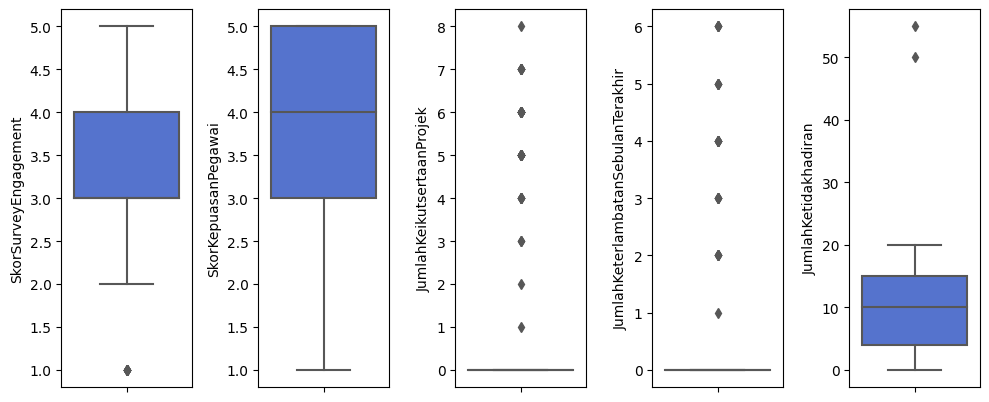

In [29]:
plt.figure(figsize=(10,20))
for i in range(0, len(nums)):
    plt.subplot(len(nums), 5,i+1)
    sns.boxplot(y=df[nums[i]], color='royalblue', orient='v')
    plt.tight_layout()

In [30]:
df[df['JumlahKetidakhadiran']>20]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
12,yearningBagels0,100895,Menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,LinkedIn,...,50.0,+6287794061xxx,yearningBagels0311@outlook.com,Magister,1,masih_bekerja,1988-08-10,2013-11-11,2020-01-08,-
115,wingedLeopard7,106436,Lainnya,Wanita,FullTime,Software Engineer (Front End),Mid_level,Biasa,Jakarta Pusat,Google_Search,...,55.0,+6289913280xxx,wingedLeopard7878@hotmail.com,Sarjana,1,masih_bekerja,1973-01-12,2011-11-28,2020-02-11,-


**Observasi:**

- Feature `jumlahketidakhadiran` memiliki outlier yang sangat ekstrim
- Feature `skorkepuasanpegawai` distribusinya sedikit skewed

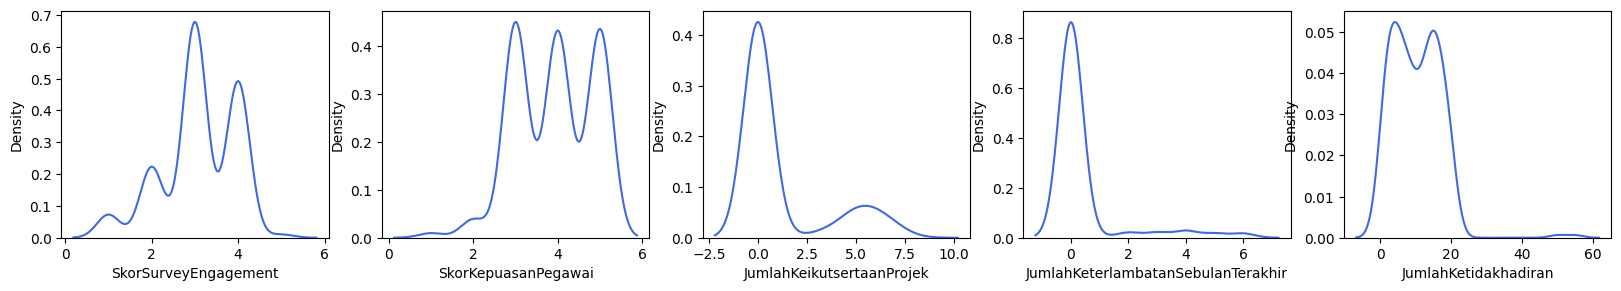

In [31]:
plt.figure(figsize=(20, 10))
for i in range(len(nums)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[nums[i]].astype(float), color='royalblue')

##**Categorical Features**

In [32]:
# Displays a unique value in a specified column
unique_values = df['PernahBekerja'].unique()
print(unique_values)

[1 'yes']


In [33]:
# Replace the values ​​that don't match
df['PernahBekerja'].replace('yes', 1, inplace=True)

In [34]:
# Displays the results of changes
print(df['PernahBekerja'])

0      1
1      1
2      1
3      1
4      1
      ..
282    1
283    1
284    1
285    1
286    1
Name: PernahBekerja, Length: 285, dtype: int64


In [35]:
for col in cats:
    print(f'Value count column {col}:')
    print(df[col].value_counts().sort_values(ascending=False))
    print()

Value count column StatusPernikahan:
Belum_menikah    132
Menikah           57
Lainnya           47
Bercerai          46
-                  3
Name: StatusPernikahan, dtype: int64

Value count column JenisKelamin:
Wanita    166
Pria      119
Name: JenisKelamin, dtype: int64

Value count column StatusKepegawaian:
FullTime      215
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

Value count column Pekerjaan:
Software Engineer (Back End)      109
Software Engineer (Front End)      71
Software Engineer (Android)        24
Product Design (UI & UX)           23
Product Manager                    17
Data Analyst                       16
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2
Product Design (UX Researcher)      1
Software Architect                  1
Name: Pekerjaan, dtype: int64

V

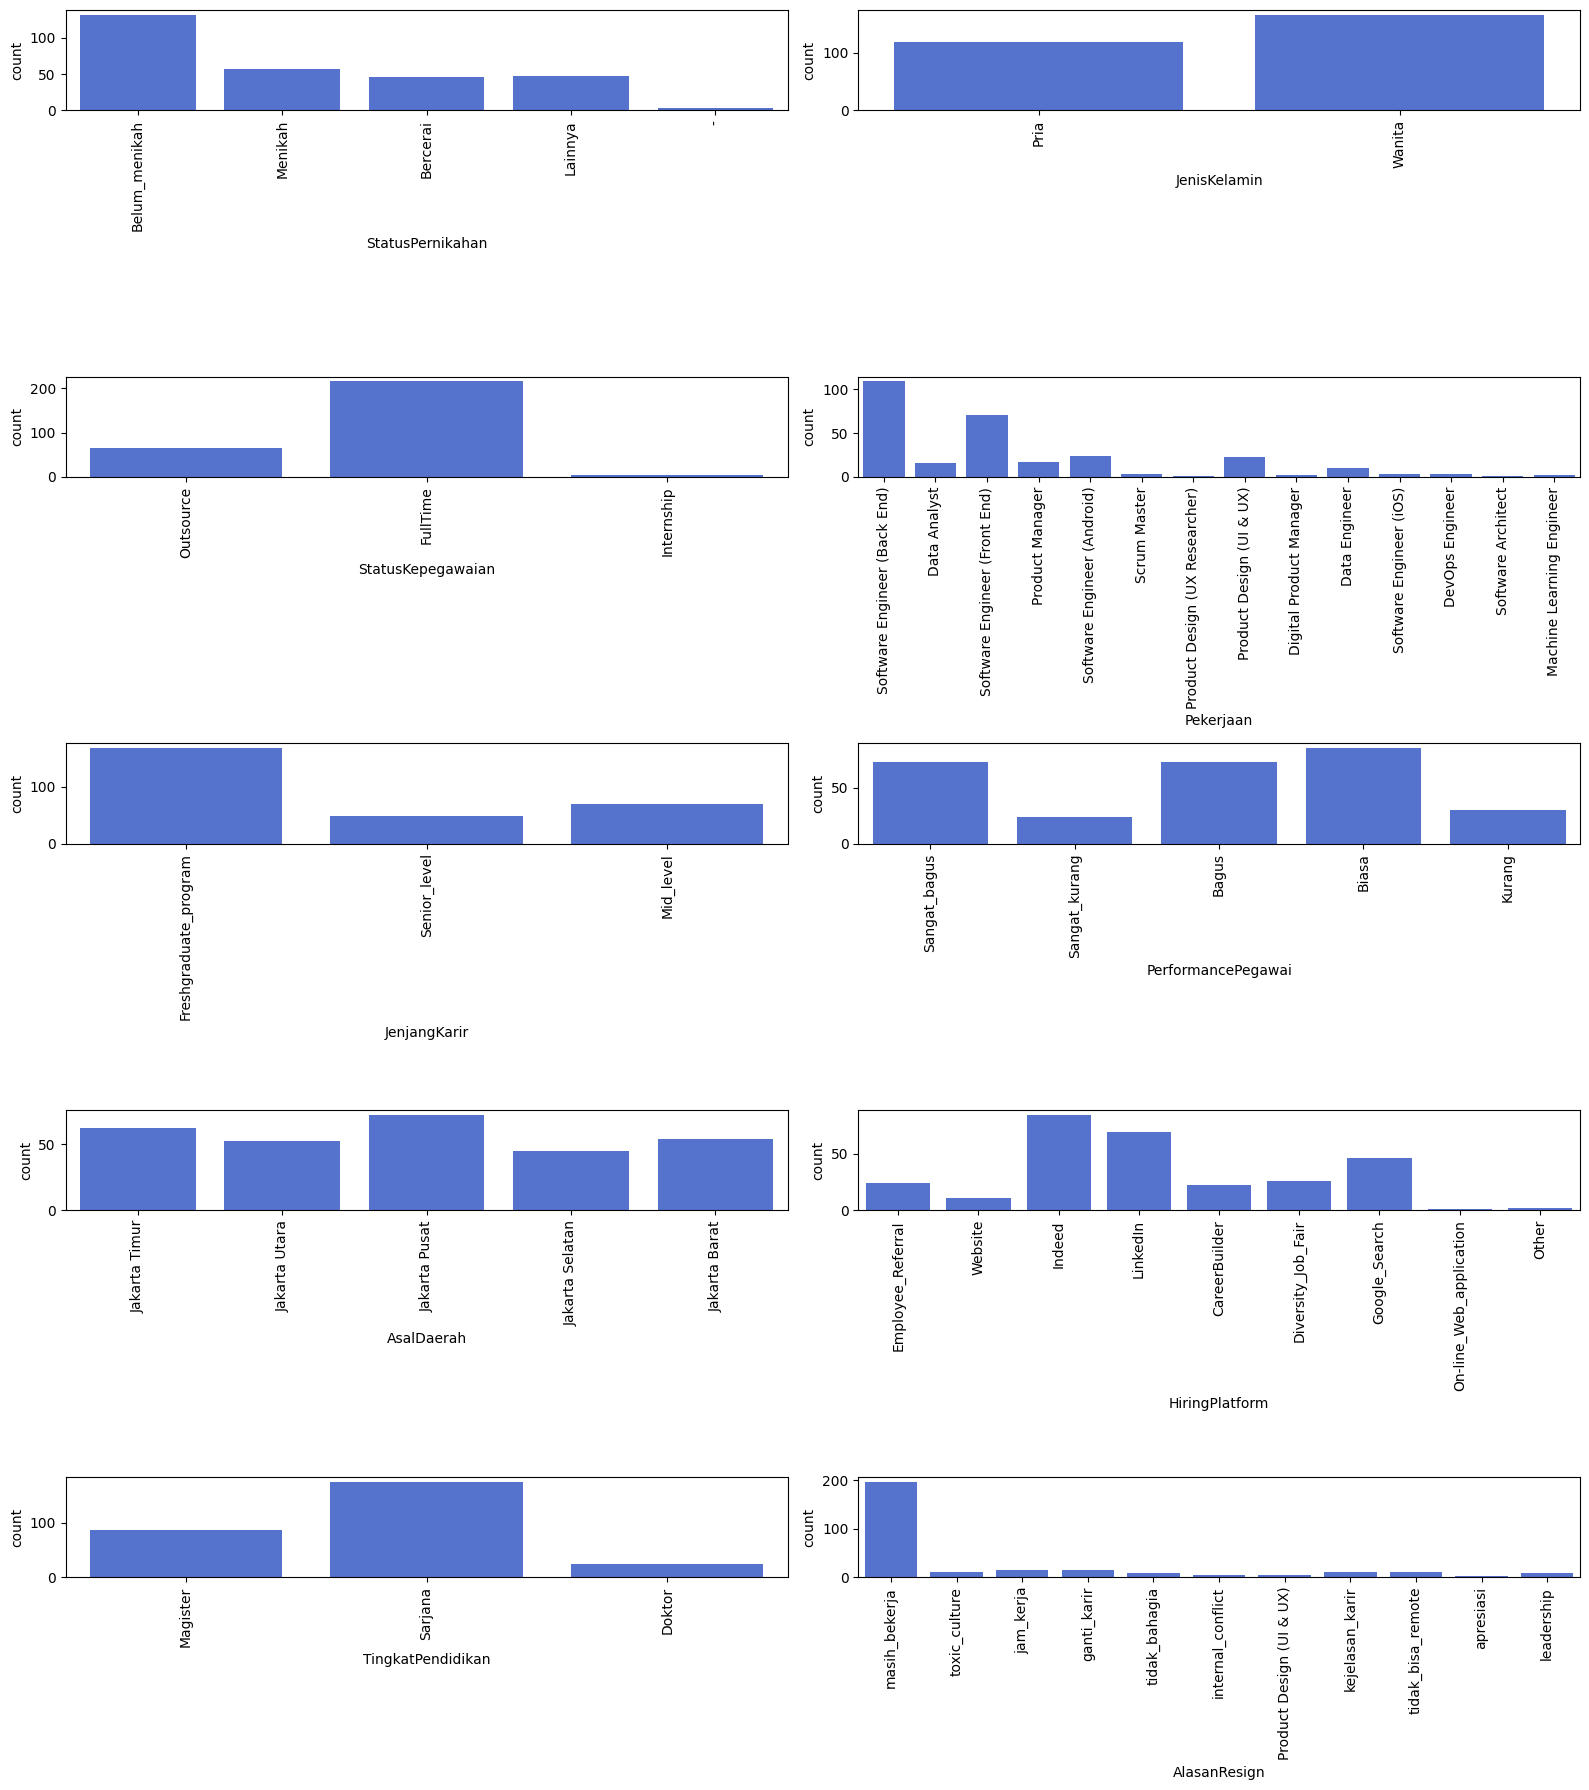

In [36]:
plt.figure(figsize=(16,18))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[cats[i]],color='royalblue')
    plt.xlabel(cats[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

##**Multivariate Analysis**

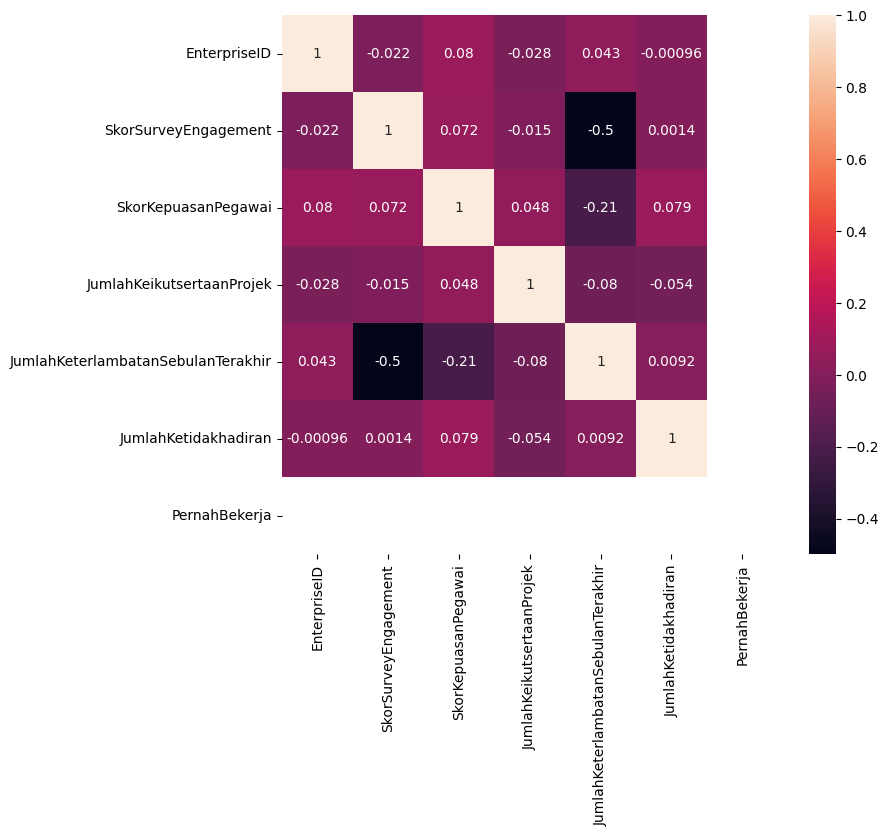

In [37]:
plt.subplots(figsize=(8,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

##**Feature Engineering**

- Feature `StatusPernikahan`, Nilai "-" diganti menjadi "Belum_menikah" (nilai mode)
- Feature `PernahBekerja` dapat di drop karena hanya mengandung 1 nilai unique.
- Feature `NomorHP` dan `Email` dapat di drop karena hanya berperan sebagai identitas user

In [38]:
# Feature 'StatusPernikahan', Nilai "-" kita ganti menjadi "Belum_menikah"
df['StatusPernikahan'].replace('-','Belum_menikah',inplace=True)

# Drop feature 'PernahBekerja'
df.drop('PernahBekerja',axis=1,inplace=True)

# Drop Feature 'NomorHP' dan 'Email'
df.drop(['NomorHP','Email'],axis=1,inplace=True)

##**Feature Extraction**

In [39]:
df['TanggalResign'].replace('-','NaN',inplace=True) # mengubah value dari yang belum resign menjadi null

In [40]:
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'])

In [41]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,4.0,0.0,0.0,9.0,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,NaT
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,4.0,4.0,0.0,3.0,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-06-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,3.0,0.0,0.0,11.0,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,3.0,0.0,4.0,6.0,Sarjana,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,3.0,0.0,0.0,11.0,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


**Observasi:**

Data tahun 1970 di TanggalResign adalah merupakan tanggal fiksi yang artinya karyawan terkait masih bekerja dan belum resign

In [42]:
df['TahunResign'] = df['TanggalResign'].dt.year
df['TahunHiring'] = df['TanggalHiring'].dt.year

#**Total Changes in Number of Employees Over The Years**

##**Resign**

In [43]:
df_group_resign = df.groupby(['TahunResign']).agg({'Username':['count']}).reset_index()
df_group_resign.columns = ['Tahun','Jumlah Resign']
df_group_resign['Tahun'] = df_group_resign['Tahun'].astype(int)
df_group_resign

,Tahun,Jumlah Resign
0,2013,5
1,2014,11
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6


##**Hiring**

In [44]:
df_group_hiring = df.groupby(['TahunHiring']).agg({'Username':['count']}).reset_index()
df_group_hiring.columns = ['Tahun','Jumlah Hiring']
df_group_hiring['Tahun'] = df_group_hiring['Tahun'].astype(int)
df_group_hiring

,Tahun,Jumlah Hiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,42
8,2014,56
9,2015,31


##**Merge Table**

In [45]:
df_group = df_group_resign.merge(df_group_hiring, how='outer').sort_values('Tahun',ascending=True).reset_index(drop=True)
df_group.fillna(0,inplace=True)
df_group['Jumlah Resign'] = df_group['Jumlah Resign'].astype(int)
df_group['Jumlah Hiring'] = df_group['Jumlah Hiring'].astype(int)
df_group

,Tahun,Jumlah Resign,Jumlah Hiring
0,2006,0,1
1,2007,0,2
2,2008,0,2
3,2009,0,7
4,2010,0,8
5,2011,0,76
6,2012,0,41
7,2013,5,42
8,2014,11,56
9,2015,8,31


In [46]:
df_group['Jumlah Karyawan'] = 0
for x in range(1,len(df_group)):
  df_group['Jumlah Karyawan'][0] = df_group['Jumlah Hiring'][0] - df_group['Jumlah Resign'][0]
  df_group['Jumlah Karyawan'][x] = df_group['Jumlah Karyawan'][x-1] + df_group['Jumlah Hiring'][x] - df_group['Jumlah Resign'][x]

In [47]:
df_group

,Tahun,Jumlah Resign,Jumlah Hiring,Jumlah Karyawan
0,2006,0,1,1
1,2007,0,2,3
2,2008,0,2,5
3,2009,0,7,12
4,2010,0,8,20
5,2011,0,76,96
6,2012,0,41,137
7,2013,5,42,174
8,2014,11,56,219
9,2015,8,31,242


##**Data Visualization**

In [48]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name="Employee", orientation="v",
    x=df_group['Tahun'],
    textposition="auto",
    text=df_group['Jumlah Karyawan'],
    y=[(df_group['Jumlah Karyawan'][x] if x == 0 else df_group['Jumlah Karyawan'][x] - df_group['Jumlah Karyawan'][x - 1]) for x in range(0, len(df_group))],
    connector={"line": {"color": "black"}},
    increasing={"marker": {"color": "green"}},
    decreasing={"marker": {"color": "red"}},
))

fig.update_layout(title='Grafik Pertumbuhan Jumlah Karyawan dari Tahun 2006 - 2020',
                  xaxis=dict(range=[2005.5, 2020.5],
                             tickmode="linear",
                             tick0=2006,
                             dtick=1),
                  yaxis_title='Total Employees', xaxis_title="Year",
                  width=1500,
                  height=800,
                  margin=dict(t=80, b=20, l=50, r=50),
                  hovermode="x unified",
                  title_font=dict(size=18, color="black"))

# Menambahkan subjudul
fig.add_annotation(
    text="Kondisi perusahaan sedang mengkhawatirkan karena jumlah karyawan yang terus berkurang selama 4 tahun terakhir",
    xref="paper", yref="paper",
    x=0, y=1.05,
    showarrow=False,
    font=dict(size=14, color="black"),
)

fig.show()

**Observasi:**

Grafik tersebut menunjukkan pertumbuhan jumlah karyawan dari tahun ke tahun sejak 2006 - 2020. Dapat dilihat bahwa kondisi perusahaan sedang mengkhawatirkan karena jumlah karyawan yang terus berkurang selama 4 tahun terakhir. Ini bisa menjadi tanda bahwa perusahaan memiliki kemungkinan mengalami masalah baik internal maupun eksternal dari perusahaan.

#**Employee Retention Percentage Based On Profession**

In [49]:
df_resign = df[df['AlasanResign']!='masih_bekerja']

In [50]:
df_pekerjaan_resign = df_resign.groupby('Pekerjaan').agg({'Username':'count'}).reset_index()
df_pekerjaan_resign.columns = ['Pekerjaan','Jumlah Karyawan Resign']
df_pekerjaan_resign

,Pekerjaan,Jumlah Karyawan Resign
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),27


##**Current Employee**

In [51]:
df_current = df[df['AlasanResign']=='masih_bekerja']

In [52]:
df_pekerjaan_current = df_current.groupby('Pekerjaan').agg({'Username':'count'}).reset_index()
df_pekerjaan_current.columns = ['Pekerjaan','Jumlah Karyawan Sekarang']
df_pekerjaan_current

,Pekerjaan,Jumlah Karyawan Sekarang
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),14
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


Merge Table

In [53]:
df_group_2 = df_pekerjaan_resign.merge(df_pekerjaan_current, how='outer').sort_values('Pekerjaan',ascending=True).reset_index(drop=True)
df_group_2.fillna(0,inplace=True)
df_group_2['Jumlah Karyawan Resign'] = df_group_2['Jumlah Karyawan Resign'].astype(int)
df_group_2

,Pekerjaan,Jumlah Karyawan Resign,Jumlah Karyawan Sekarang
0,Data Analyst,8,8
1,Data Engineer,3,7
2,DevOps Engineer,0,3
3,Digital Product Manager,0,2
4,Machine Learning Engineer,0,2
5,Product Design (UI & UX),9,14
6,Product Design (UX Researcher),0,1
7,Product Manager,6,11
8,Scrum Master,0,3
9,Software Architect,0,1


In [54]:
df_group_2['Jumlah Karyawan'] = df_group_2['Jumlah Karyawan Resign'] + df_group_2['Jumlah Karyawan Sekarang']
df_group_2['Persentase Karyawan yang Masih Aktif'] = df_group_2['Jumlah Karyawan Sekarang']*100/df_group_2['Jumlah Karyawan']
df_group_2['Persentase Karyawan yang Masih Aktif'] = round(df_group_2['Persentase Karyawan yang Masih Aktif'],1)
df_group_2.sort_values(['Jumlah Karyawan'],ascending=False)

,Pekerjaan,Jumlah Karyawan Resign,Jumlah Karyawan Sekarang,Jumlah Karyawan,Persentase Karyawan yang Masih Aktif
11,Software Engineer (Back End),28,81,109,74.3
12,Software Engineer (Front End),27,44,71,62.0
10,Software Engineer (Android),7,17,24,70.8
5,Product Design (UI & UX),9,14,23,60.9
7,Product Manager,6,11,17,64.7
0,Data Analyst,8,8,16,50.0
1,Data Engineer,3,7,10,70.0
2,DevOps Engineer,0,3,3,100.0
8,Scrum Master,0,3,3,100.0
13,Software Engineer (iOS),0,3,3,100.0


##**Data Visualization**

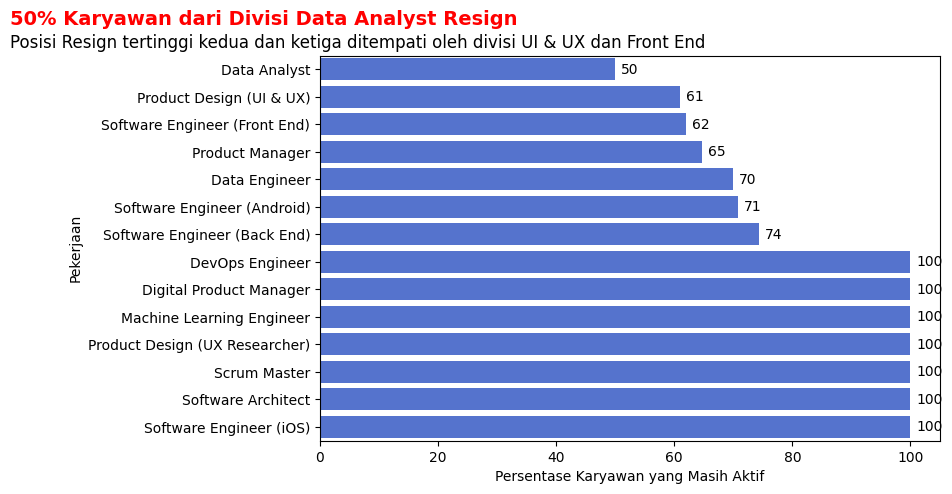

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
ax = sns.barplot(y='Pekerjaan', x='Persentase Karyawan yang Masih Aktif', data=df_group_2.sort_values('Persentase Karyawan yang Masih Aktif'), color='royalblue')

for p in ax.patches:
    width = p.get_width()  # get bar length
    ax.text(width + 1,  # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2,  # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width),  # set variable to display, 0 decimals
            ha='left',  # horizontal alignment
            va='center')  # vertical alignment

# Menambahkan judul di sebelah kiri
plt.text(-0.5, 1.08, '50% Karyawan dari Divisi Data Analyst Resign', fontsize=14, fontweight='bold',color='red', transform=ax.transAxes)

# Menambahkan subjudul di sebelah kiri dengan teks berwarna hitam
plt.text(-0.5, 1.02, "Posisi Resign tertinggi kedua dan ketiga ditempati oleh divisi UI & UX dan Front End", fontsize=12, color='black', transform=ax.transAxes)

plt.show()

**Observasi:**

Dari grafik diatas diketahui bahwa divisi Data Analyst merupakan divisi dengan persentase pengunduran diri tertinggi yaitu mencapai 50%.

#**Data Analyst Profession Resignation Explore**

In [56]:
df_da = df[df['Pekerjaan']=='Data Analyst']

def resign(x):
  if x == 'masih_bekerja':
    return 'Masih Bekerja'
  else:
    return 'Resign'

df_da['Resign'] = df_da.apply(lambda x: resign(x['AlasanResign']),axis=1)
df_da['Resign'].value_counts()

Resign           8
Masih Bekerja    8
Name: Resign, dtype: int64

##**Jenjang karir**

In [57]:
df_da_jenjangkarir = df_da.groupby(['JenjangKarir','Resign']).agg({'Username':'count'}).reset_index()
df_da_jenjangkarir.columns = ['Jenjang Karir','Status','Jumlah Employee']
df_da_jenjangkarir

,Jenjang Karir,Status,Jumlah Employee
0,Freshgraduate_program,Masih Bekerja,2
1,Freshgraduate_program,Resign,8
2,Mid_level,Masih Bekerja,6


##**Data Visualization**

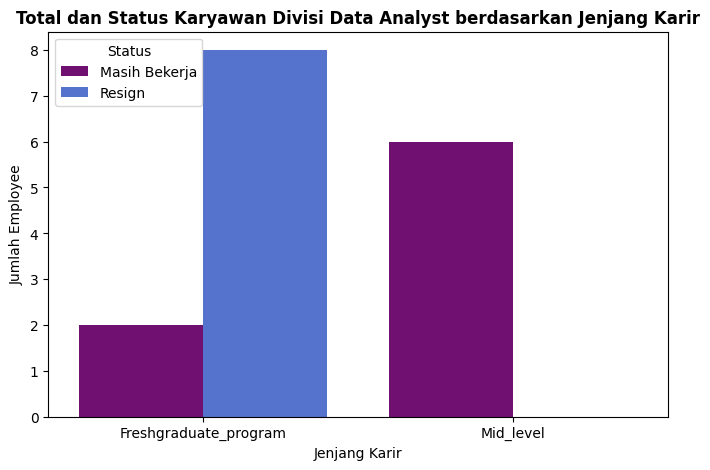

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat palet warna dengan lightblue dan purple
colors = ["purple", "royalblue"]

# Membuat gambar
plt.figure(figsize=(8, 5))

# Menggunakan palet warna yang telah dibuat
sns.barplot(x='Jenjang Karir', y='Jumlah Employee', hue='Status', data=df_da_jenjangkarir, palette=colors)

plt.title('Total dan Status Karyawan Divisi Data Analyst berdasarkan Jenjang Karir', fontweight='bold')

# Menampilkan plot
plt.show()

**Observasi:**

Pada grafik diatas didapatkan bahwa semua karyawan yang berstatus resign pada divisi Data Analyst adalah dari Fresh Graduate Program dimana program tersebut juga memiliki jumlah karyawan resign yang jauh lebih banyak dibanding jumlah karyawan yang masih bekerja

**Rekomendasi:**

Perusahaan dapat memberikan kesempatan pengembangan diri yang lebih baik seperti menyediakan training di setiap divisi khususnya kepada karyawan baru memberikan tawaran gaji dan benefit yang lebih kompetitif kepada karyawan khususnya program fresh graduate, serta menciptakan lingkungan kerja yang lebih suportif.

##**Performa Karyawan**

In [59]:
df_da_performa = df_da.groupby(['PerformancePegawai','Resign']).agg({'Username':'count'}).reset_index()
df_da_performa.columns = ['Performa Karyawan','Status','Jumlah Employee']
df_da_performa

,Performa Karyawan,Status,Jumlah Employee
0,Bagus,Masih Bekerja,2
1,Bagus,Resign,1
2,Biasa,Masih Bekerja,1
3,Biasa,Resign,2
4,Kurang,Masih Bekerja,1
5,Sangat_bagus,Masih Bekerja,4
6,Sangat_bagus,Resign,4
7,Sangat_kurang,Resign,1


In [60]:
performa = ['Sangat_kurang','Kurang','Biasa','Bagus','Sangat_bagus']
df_da_performa['Performa Karyawan'] = pd.Categorical(df_da_performa['Performa Karyawan'], categories=performa, ordered=True) #sort berdasarkan performa
df_da_performa = df_da_performa.sort_values('Performa Karyawan')  #

##**Data Visualization**

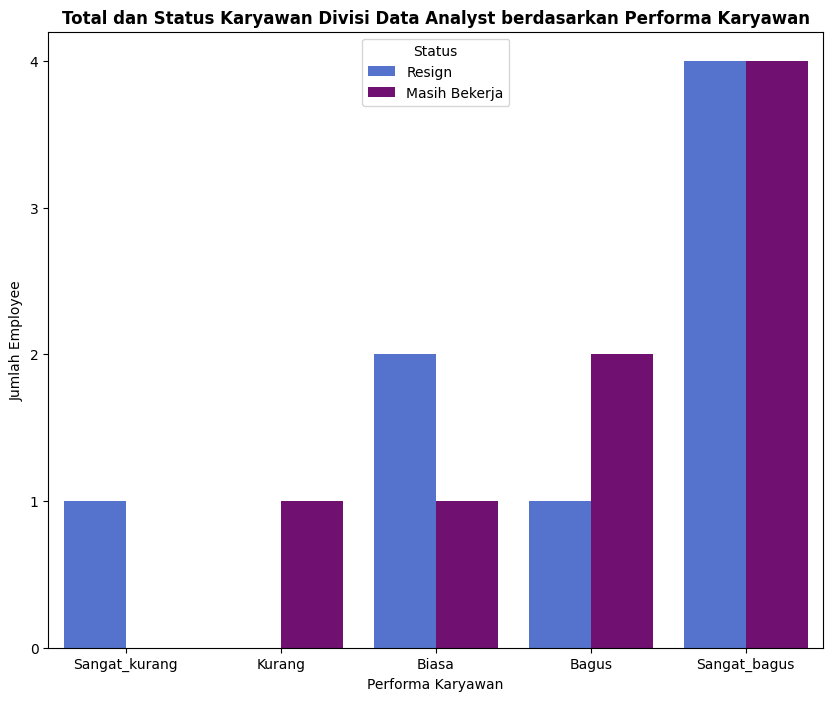

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat palet warna dengan lightblue dan purple
colors = ["royalblue", "purple"]

# Membuat gambar
plt.figure(figsize=(10, 8))

# Menggunakan palet warna yang telah dibuat
ax = sns.barplot(x='Performa Karyawan', y='Jumlah Employee', hue='Status', data=df_da_performa, palette=colors)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax.set_title('Total dan Status Karyawan Divisi Data Analyst berdasarkan Performa Karyawan', fontweight='bold')

# Menampilkan plot
plt.show()

**Observasi:**

Dari grafik diatas dapat diketahui bahwa dari 8 karyawan dari divisi Data Analyst yang Resign, 4 diantaranya memiliki performa sangat bagus dan 1 karyawan memiliki perfoma bagus. Hal ini tentu sangat merugikan untuk perusahaan karena karyawan yang resign adalah karyawan dengan performa yang baik.

**Rekomendasi:**

Perusahaan dapat menawarkan gaji, benefit dan work-life balance yang lebih baik kepada karyawan dengan performa yang bagus. Selain itu, perusahaan diharapkan dapat menawarkan jenjang karir dan pengembangan diri yang baik kepada karyawan dengan performa bagus agar karyawan tersebut merasa dihargai dan merasa akan memiliki jenjang karir yang baik di perusahaan kita dengan harapan karyawan-karyawan yang bagus tersebut akan memilih untuk bertahan di perusahaan.



##**Alasan Resign**

In [63]:
df['AlasanResign'].value_counts()

masih_bekerja               197
jam_kerja                    15
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: AlasanResign, dtype: int64

In [64]:
df_da_alasan = df_da.groupby(['AlasanResign','Resign']).agg({'Username':'count'}).reset_index()
df_da_alasan.columns = ['Alasan Resign','Status','Jumlah Employee']
df_da_alasan

,Alasan Resign,Status,Jumlah Employee
0,internal_conflict,Resign,2
1,masih_bekerja,Masih Bekerja,8
2,toxic_culture,Resign,6


##**Data Visualization**

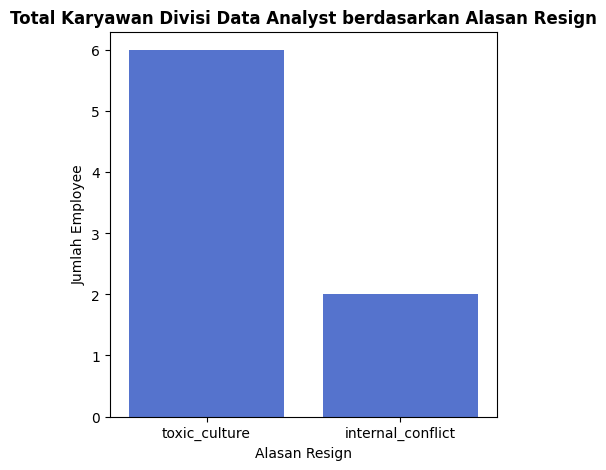

In [65]:
plt.figure(figsize=(5,5))
ax=sns.barplot(x='Alasan Resign',y='Jumlah Employee',data=df_da_alasan[df_da_alasan['Alasan Resign']!='masih_bekerja'].sort_values('Jumlah Employee',ascending=False),color='royalblue')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax.set_title('Total Karyawan Divisi Data Analyst berdasarkan Alasan Resign', fontweight='bold')

plt.show()

**Insight:**

Dari grafik diatas diketahui bahwa dari sekian banyak alasan resign, 6 karyawan dari divisi Data Analyst resign dengan alasan toxic culture dan 2 lainnya resign dengan alasan internal conflict. Kedua alasan tersebut cukup menggambarkan bahwa adanya faktor yang kurang baik dari posisi internal Data Analyst pada perusahaan ini.

**Rekomendasi:**

Perusahaan harus dapat mengatasi konflik internal yang terjadi antar karyawan dengan memfasilitasi pertemuan antar karyawan atau mediator untuk menyelesaikan masalah. Selain itu, perusahaan harus mengevaluasi kembali budaya organisasi yang ada untuk mencari tahu apa yang "toxic" bagi karyawan dan memastikan budaya yang dimiliki adalah budaya yang positif dan memotivasi karyawan.

#**Data Preparation for Modeling**

##**Feature Engineering**

###**Resign**

In [66]:
# membuat target (resign atau tidak)
def resign(x):
  if x == 'masih_bekerja':
    return 0
  else:
    return 1

df['Resign'] = df.apply(lambda x: resign(x['AlasanResign']),axis=1)
df['Resign'].value_counts()

0    197
1     88
Name: Resign, dtype: int64

In [67]:
max(df['TahunHiring']) # mencari nilai tahun maksimum

2018

In [68]:
max(df[df['TahunResign'].notnull()]['TahunResign']) # mencari nilai tahun maksimum

2020.0

In [69]:
max(df['TanggalPenilaianKaryawan'])

'2020-2-28'

In [70]:
# membuat feature baru yaitu lama bekerja (dalam tahun)
df['LamaBekerja'] = (df['TahunResign'] - df['TahunHiring']) # menghitung lama bekerja dari tahun resign dikurangi tahun hiring
df['LamaBekerja'].fillna(2020-df['TahunHiring'],inplace=True) # untuk yang masih bekerja, kita akan menggunakan tahun sekarang (asumsi 2020 karena dataset mempunyai data max tahun 2020) dikurangi tahun hiring
df['LamaBekerja'].value_counts()

 6.0     54
 9.0     53
 7.0     40
 8.0     34
 5.0     33
 4.0     18
 3.0     13
 1.0      9
 0.0      9
 2.0      6
 11.0     5
 10.0     5
 12.0     2
-1.0      1
 14.0     1
-4.0      1
 13.0     1
Name: LamaBekerja, dtype: int64

In [71]:
df = df[df['LamaBekerja']>=0] # remove baris yang memiliki nilai minus (kesalahan data karena tidak mungkin resign terjadi sebelum hiring)

##**Feature Selection**

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            283 non-null    object        
 1   EnterpriseID                        283 non-null    int64         
 2   StatusPernikahan                    283 non-null    object        
 3   JenisKelamin                        283 non-null    object        
 4   StatusKepegawaian                   283 non-null    object        
 5   Pekerjaan                           283 non-null    object        
 6   JenjangKarir                        283 non-null    object        
 7   PerformancePegawai                  283 non-null    object        
 8   AsalDaerah                          283 non-null    object        
 9   HiringPlatform                      283 non-null    object        
 10  SkorSurveyEngagement      

In [73]:
for col in df.select_dtypes('object').columns:
    print(f'Value count column {col}:')
    print(df[col].value_counts().sort_values(ascending=False))
    print()

Value count column Username:
spiritedPorpoise3    1
lyingMussel8         1
stressedTruffle1     1
shyTermite7          1
emptyMacaw4          1
                    ..
pluckyMacaw2         1
spiritedWeaver4      1
affectedPup0         1
amusedIcecream0      1
puzzledFish5         1
Name: Username, Length: 283, dtype: int64

Value count column StatusPernikahan:
Belum_menikah    134
Menikah           56
Lainnya           47
Bercerai          46
Name: StatusPernikahan, dtype: int64

Value count column JenisKelamin:
Wanita    164
Pria      119
Name: JenisKelamin, dtype: int64

Value count column StatusKepegawaian:
FullTime      213
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

Value count column Pekerjaan:
Software Engineer (Back End)      109
Software Engineer (Front End)      70
Software Engineer (Android)        24
Product Design (UI & UX)           23
Product Manager                    17
Data Analyst                       15
Data Engineer                   

**eature-feature yang di drop:**

- `StatusPernikahan`, `JenisKelamin` dan `AsalDaerah`, `Username` dan `EnterpriseID` -> Identitas User
- `AlasanResign` -> feature tidak relevan untuk memprediksi resign
- `TanggalLahir`, `TanggalPenilaianKaryawan`, `TanggalResign` dan `TahunResign` -> feature tidak relevan untuk memprediksi resign
- `TanggalHiring` dan `TahunHiring` -> sudah diconvert ke feature LamaBekerja
- `Pekerjaan` dan `HiringPlatform` -> terlalu banyak nilai unique
- `StatusKepegawaian` -> pada dasarnya hanya pegawai fulltime yang benar-benar bekerja untuk perusahaan sementara outsource dan internship tidak berstatus pegawai perusahaan

In [74]:
df_model = df.drop(['Username','EnterpriseID','StatusPernikahan','JenisKelamin','AsalDaerah','AlasanResign','TanggalLahir','TanggalHiring',
                   'TanggalPenilaianKaryawan','TanggalResign','TahunResign',
                    'StatusKepegawaian','Pekerjaan','HiringPlatform','TahunHiring'],axis=1)
df_model.head(5)

,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,Resign,LamaBekerja
0,Freshgraduate_program,Sangat_bagus,4,4.0,0.0,0.0,9.0,Magister,0,9.0
1,Freshgraduate_program,Sangat_kurang,4,4.0,4.0,0.0,3.0,Sarjana,1,4.0
2,Freshgraduate_program,Bagus,4,3.0,0.0,0.0,11.0,Magister,1,3.0
3,Freshgraduate_program,Bagus,3,3.0,0.0,4.0,6.0,Sarjana,0,6.0
4,Freshgraduate_program,Bagus,3,3.0,0.0,0.0,11.0,Sarjana,1,5.0


##**Feature Encoding**

In [75]:
df_model.select_dtypes('object').head()

,JenjangKarir,PerformancePegawai,TingkatPendidikan
0,Freshgraduate_program,Sangat_bagus,Magister
1,Freshgraduate_program,Sangat_kurang,Sarjana
2,Freshgraduate_program,Bagus,Magister
3,Freshgraduate_program,Bagus,Sarjana
4,Freshgraduate_program,Bagus,Sarjana


##**Label Encoding**

In [76]:
df_model['PerformancePegawai'].value_counts()

Biasa            84
Bagus            73
Sangat_bagus     72
Kurang           30
Sangat_kurang    24
Name: PerformancePegawai, dtype: int64

In [77]:
mapping_perform = {
    'Sangat_kurang' : 0,
    'Kurang' : 1,
    'Biasa' : 2,
    'Bagus' : 3,
    'Sangat_bagus' : 4
}

df_model['PerformancePegawai'] = df_model['PerformancePegawai'].map(mapping_perform)
df_model['PerformancePegawai'].value_counts()

2    84
3    73
4    72
1    30
0    24
Name: PerformancePegawai, dtype: int64

In [78]:
df_model['TingkatPendidikan'].value_counts()

Sarjana     173
Magister     86
Doktor       24
Name: TingkatPendidikan, dtype: int64

In [79]:
mapping_pend = {
    'Sarjana' : 0,
    'Magister' : 1,
    'Doktor' : 2
}

df_model['TingkatPendidikan'] = df['TingkatPendidikan'].map(mapping_pend)
df_model['TingkatPendidikan'].value_counts()

0    173
1     86
2     24
Name: TingkatPendidikan, dtype: int64

##**One Hot Encoding**

In [80]:
df_model.select_dtypes('object').head()

,JenjangKarir
0,Freshgraduate_program
1,Freshgraduate_program
2,Freshgraduate_program
3,Freshgraduate_program
4,Freshgraduate_program


In [81]:
df_model.shape

(283, 10)

In [82]:
for col in df_model.select_dtypes('object').columns:
  dummies = pd.get_dummies(df_model[col],prefix=col)
  df_model = pd.concat([df_model.drop(col,axis=1),dummies],axis=1)

df_model.head()

,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,Resign,LamaBekerja,JenjangKarir_Freshgraduate_program,JenjangKarir_Mid_level,JenjangKarir_Senior_level
0,4,4,4.0,0.0,0.0,9.0,1,0,9.0,1,0,0
1,0,4,4.0,4.0,0.0,3.0,0,1,4.0,1,0,0
2,3,4,3.0,0.0,0.0,11.0,1,1,3.0,1,0,0
3,3,3,3.0,0.0,4.0,6.0,0,0,6.0,1,0,0
4,3,3,3.0,0.0,0.0,11.0,0,1,5.0,1,0,0


##**Handling Outlier**

<Axes: >

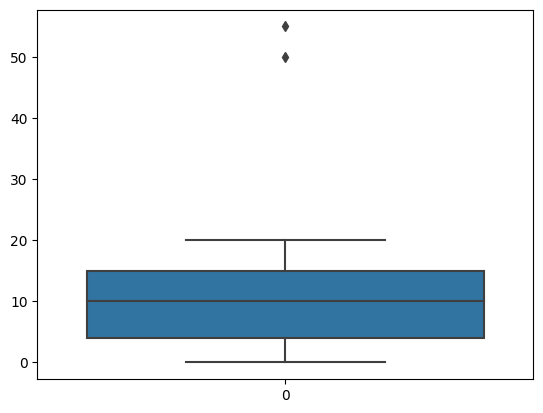

In [83]:
# satu-satunya feature tersisa yang memiliki value yang besar (bukan satuan)

sns.boxplot(df_model['JumlahKetidakhadiran'])

In [84]:
df_model = df_model[df_model['JumlahKetidakhadiran']<30]

In [85]:
df_model.head()

,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,Resign,LamaBekerja,JenjangKarir_Freshgraduate_program,JenjangKarir_Mid_level,JenjangKarir_Senior_level
0,4,4,4.0,0.0,0.0,9.0,1,0,9.0,1,0,0
1,0,4,4.0,4.0,0.0,3.0,0,1,4.0,1,0,0
2,3,4,3.0,0.0,0.0,11.0,1,1,3.0,1,0,0
3,3,3,3.0,0.0,4.0,6.0,0,0,6.0,1,0,0
4,3,3,3.0,0.0,0.0,11.0,0,1,5.0,1,0,0


##**Data Train/Test Split**

In [86]:
X = df_model.drop('Resign',axis=1)
y = df_model['Resign']

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify= y, test_size=0.3, random_state=42)
print(f'Jumlah Data Train : {X_train.shape[0]}')
print(f'Jumlah Data Test: {X_test.shape[0]}')

Jumlah Data Train : 196
Jumlah Data Test: 85


In [88]:
y_train.value_counts()

0    136
1     60
Name: Resign, dtype: int64

**Observasi:**

Dari keterangan di atas diketahui bahwa data tersebut tidak seimbang.

In [89]:
y_test.value_counts()

0    59
1    26
Name: Resign, dtype: int64

##**Feature Scaling**

In [90]:
ls_scl = ['SkorSurveyEngagement','SkorKepuasanPegawai',
        'JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir',
        'JumlahKetidakhadiran','LamaBekerja','PerformancePegawai','TingkatPendidikan',
          'JenjangKarir_Senior_level','JenjangKarir_Freshgraduate_program','JenjangKarir_Mid_level']

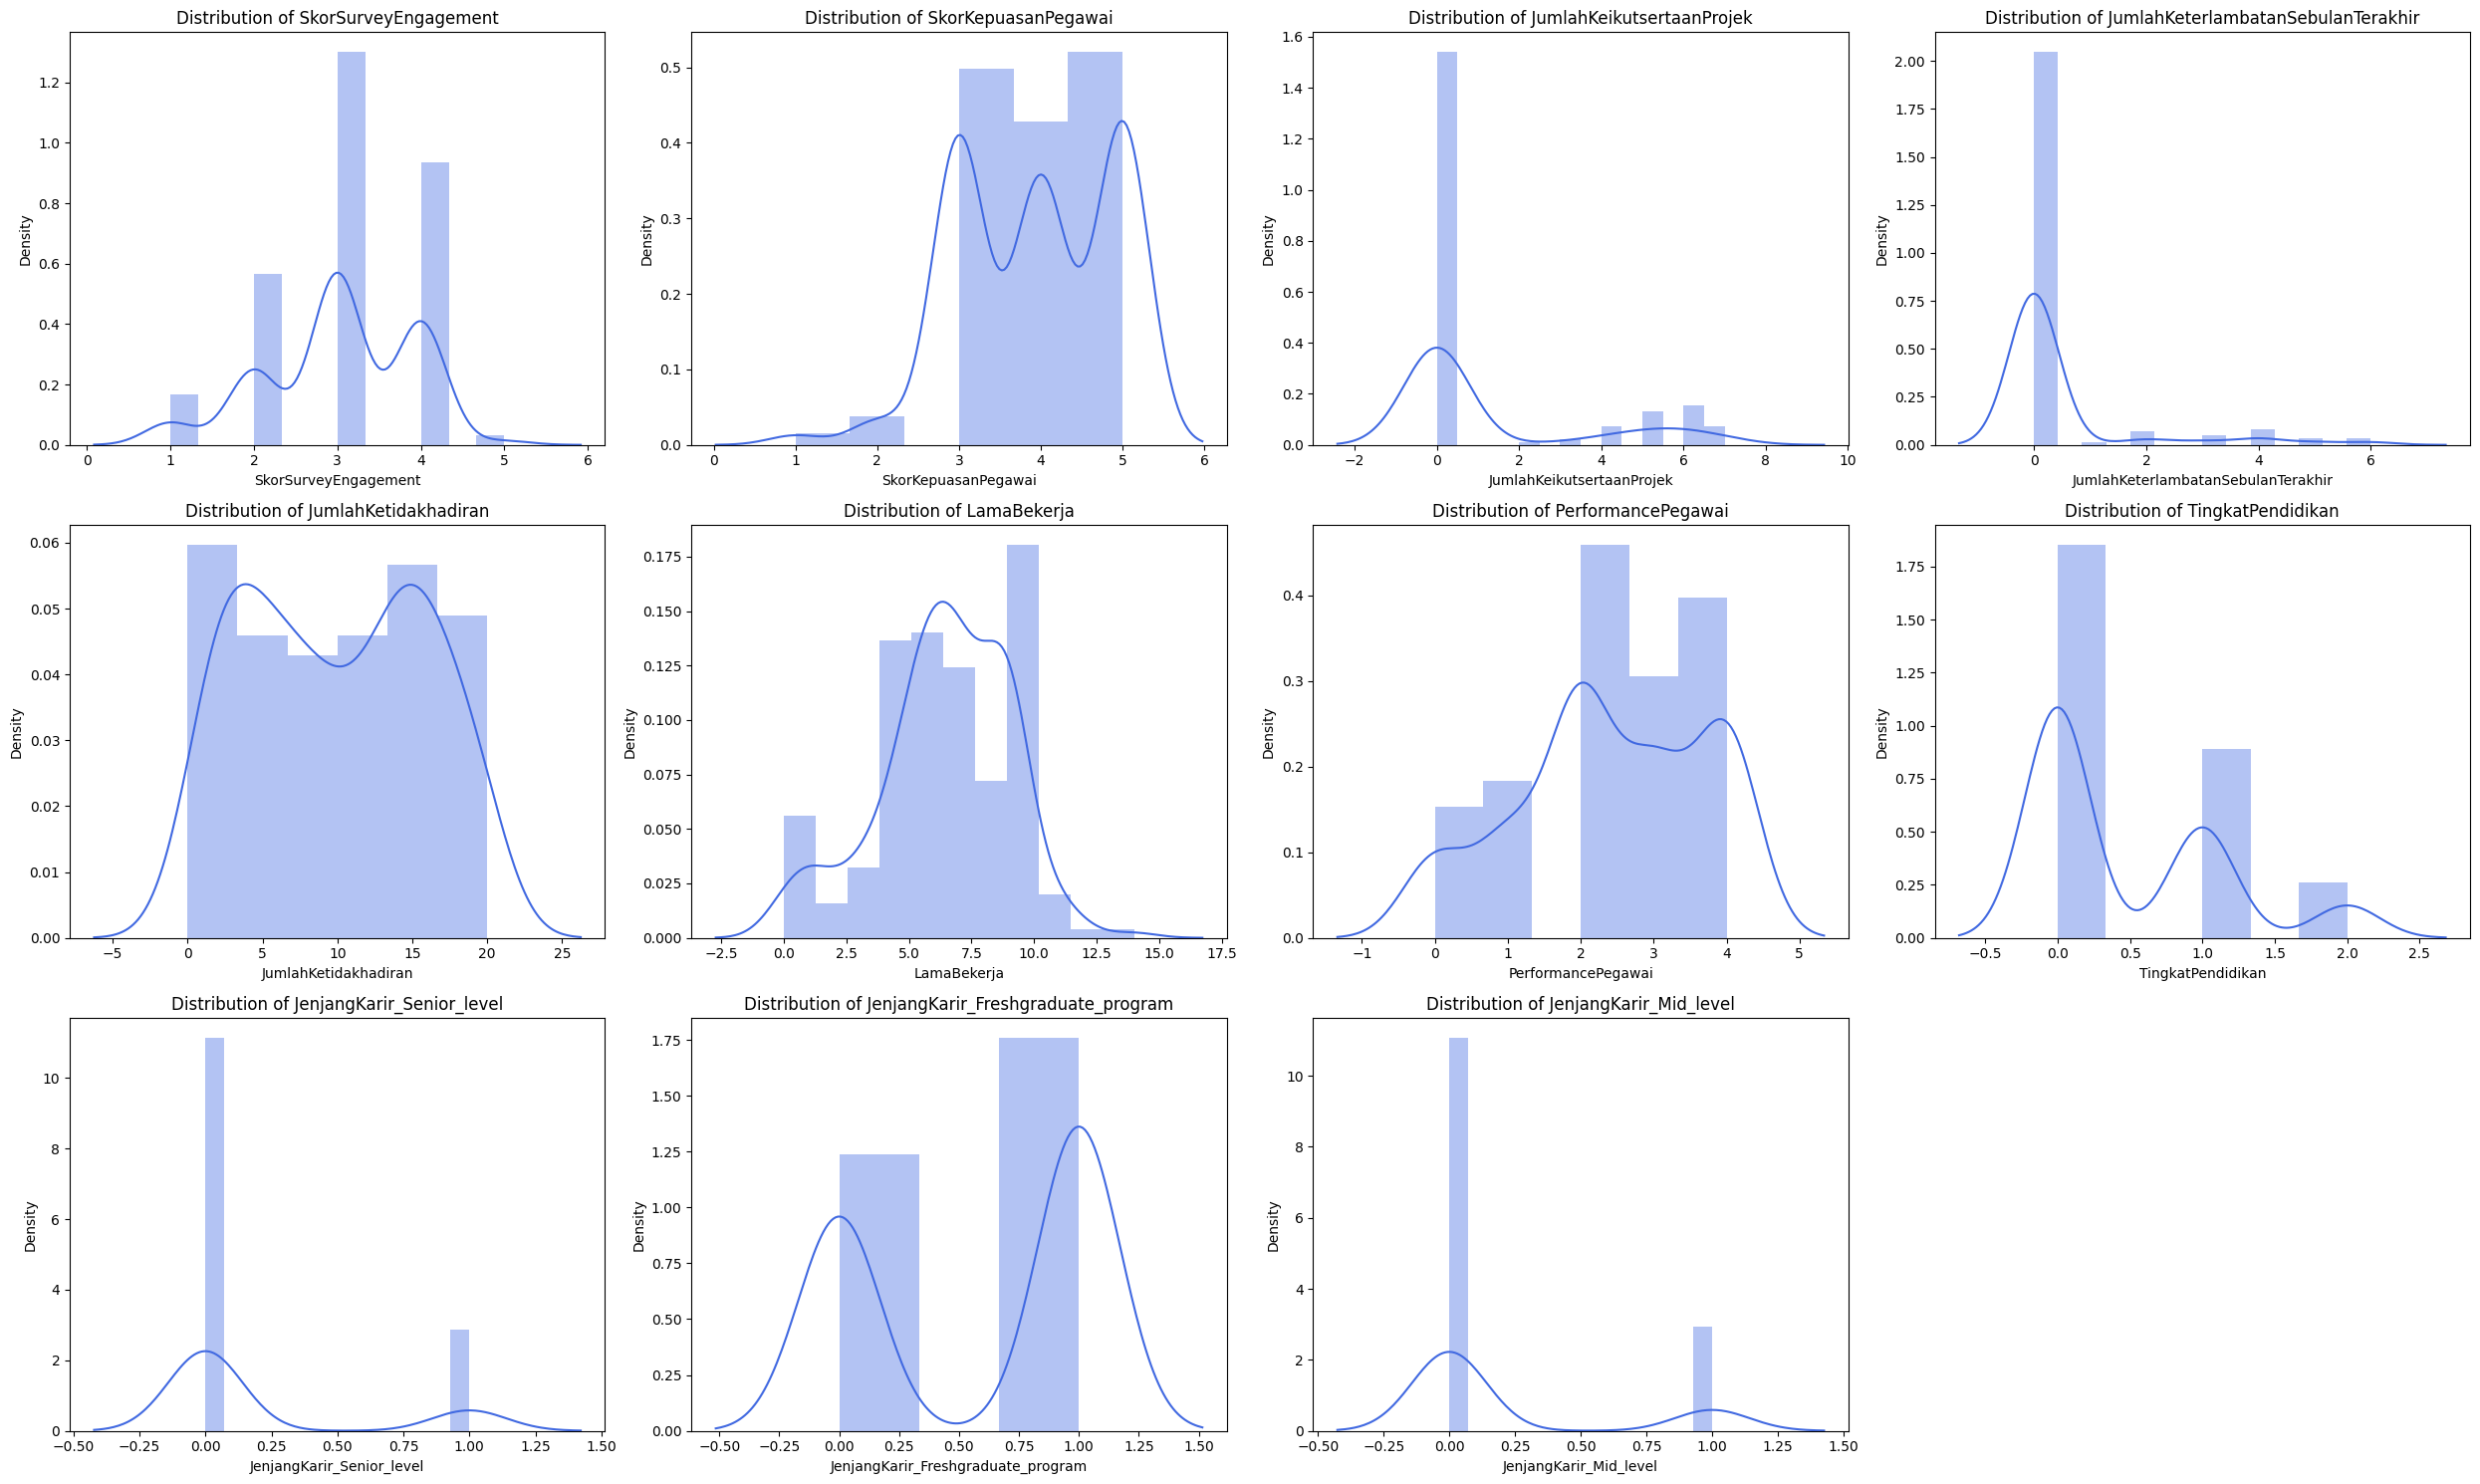

In [91]:
plt.figure(figsize=(25, 15))
for i in range(0, len(ls_scl)):
    plt.subplot(3, 4, i+1)
    sns.distplot(X_train[ls_scl[i]], color='royalblue')
    plt.title('Distribution of {}'.format(ls_scl[i]))
    plt.tight_layout()
plt.show()

Train

In [92]:
norm = StandardScaler()
for i in ls_scl:
  X_train['norm_'+i] = norm.fit_transform(X_train[i].values.reshape(len(X_train),1))

X_train =  X_train.drop(ls_scl, axis=1)

Test

In [93]:
norm = StandardScaler()
for i in ls_scl:
  X_test['norm_'+i] = norm.fit_transform(X_test[i].values.reshape(len(X_test),1))

X_test =  X_test.drop(ls_scl, axis=1)

Oversampling

In [94]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 36 to 146
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   norm_SkorSurveyEngagement                196 non-null    float64
 1   norm_SkorKepuasanPegawai                 196 non-null    float64
 2   norm_JumlahKeikutsertaanProjek           196 non-null    float64
 3   norm_JumlahKeterlambatanSebulanTerakhir  196 non-null    float64
 4   norm_JumlahKetidakhadiran                196 non-null    float64
 5   norm_LamaBekerja                         196 non-null    float64
 6   norm_PerformancePegawai                  196 non-null    float64
 7   norm_TingkatPendidikan                   196 non-null    float64
 8   norm_JenjangKarir_Senior_level           196 non-null    float64
 9   norm_JenjangKarir_Freshgraduate_program  196 non-null    float64
 10  norm_JenjangKarir_Mid_level              196 non-

**Observasi:**

Karena terdapat data yang tidak seimbang maka akan ditangani dengan menggunakan oversampling.

In [95]:
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [96]:
X_train_over.shape

(272, 11)

In [97]:
y_train_over.value_counts()

0    136
1    136
Name: Resign, dtype: int64

#**Data Modeling**

In [98]:
# Algoritma Machine Learning
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=42)
grad = GradientBoostingClassifier()
xg = XGBClassifier()
MLA = [logreg, knn, dtc, rf, grad, xg]

In [99]:
# Create model evaluation results in the form of a Data Frame
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    start = dt.now()
    predicted = alg.fit(X_train_over, y_train_over).predict(X_test)
    y_pred_proba_test = alg.fit(X_train_over, y_train_over).predict_proba(X_test)
    y_pred_proba_train = alg.fit(X_train_over, y_train_over).predict_proba(X_train_over)
    score = cross_validate(alg, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy (%)'] = round(alg.score(X_train_over, y_train_over), 3)*100
    MLA_compare.loc[row_index, 'Test Accuracy (%)'] = round(alg.score(X_test, y_test), 3)*100
    MLA_compare.loc[row_index, 'Precission (%)'] = round(precision_score(y_test, predicted),3)*100
    MLA_compare.loc[row_index, 'Recall (%)'] = round(recall_score(y_test, predicted),3)*100
    MLA_compare.loc[row_index, 'F1-Score (%)'] = round((f1_score(y_test, predicted)),3)*100
    MLA_compare.loc[row_index, 'roc-auc (test prob)'] = round((roc_auc_score(y_test, y_pred_proba_test[:, 1])),3)
    MLA_compare.loc[row_index, 'roc-auc (train prob)'] = round((roc_auc_score(y_train_over, y_pred_proba_train[:, 1])),3)
    MLA_compare.loc[row_index, 'roc-auc (crossval train)'] = round(score['train_score'].mean(),3)
    MLA_compare.loc[row_index, 'roc-auc (crossval test)'] = round(score['test_score'].mean(),3)
    MLA_compare.loc[row_index, 'Time used'] = (dt.now()-start).total_seconds()

    row_index+=1

In [100]:
MLA_compare

,MLA used,Train Accuracy (%),Test Accuracy (%),Precission (%),Recall (%),F1-Score (%),roc-auc (test prob),roc-auc (train prob),roc-auc (crossval train),roc-auc (crossval test),Time used
0,LogisticRegression,78.3,72.9,54.1,76.9,63.5,0.811,0.876,0.855,0.802,0.291523
1,KNeighborsClassifier,84.6,72.9,55.2,61.5,58.2,0.719,0.938,0.881,0.692,0.135966
2,DecisionTreeClassifier,100.0,76.5,58.8,76.9,66.7,0.757,1.000,1.000,0.679,0.074951
3,RandomForestClassifier,100.0,75.3,57.6,73.1,64.4,0.825,1.000,1.000,0.808,2.960762
4,GradientBoostingClassifier,98.2,69.4,50.0,84.6,62.9,0.844,0.998,0.995,0.790,1.174315
5,XGBClassifier,100.0,64.7,45.8,84.6,59.5,0.815,1.000,1.000,0.796,0.644383


**Observasi:**

Dari beberapa algoritma yang digunakan, ditemukan bahwa algoritma Regresi Logistik mempunyai kinerja yang baik dibandingkan dengan algoritma lainnya. Namun dari pengujian train ROC-AUC terlihat bahwa semua model mengalami overfitting, sehingga akan digunakan hyperparameter untuk mengatasi overfitting.

##**Tuning Hyperparameter**

In [101]:
#Evaluation for tuned model
def evaluation_tuned(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba_test = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print('AUC Score Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_train,y_pred_proba_train[:,1]),3)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba_test[:,1]),3)}\n')
    print('='*30)

    print('Others Metrics Evaluation:')
    print(f'Train Accuracy Score : {round(accuracy_score(y_train,y_pred_train),3)}')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),3)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),3)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),3)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),3)}\n')
    print('='*30)

    print('**CONFUSION MATRIX**')
    print(confusion_matrix(y_test, model.predict(X_test)))
    print('='*30)

    print(f'Best Parameter: {model.best_params_}')

###**Logistic Regression**

In [102]:
pipeline_logreg = Pipeline([('smt', SMOTE(random_state=42)),
                            ('logreg', LogisticRegression())])

logreg_hyparameters = {"logreg__penalty": ['l1', 'l2','elasticnet'],
                       "logreg__C":[float(x) for x in np.linspace(0.001, 10, 100)],
                       "logreg__solver" : ['newton-cg', 'lbfgs', 'liblinear']
                       }

tuned_logreg = RandomizedSearchCV(pipeline_logreg, logreg_hyparameters, cv = 5, random_state=42,
                                  n_jobs=-1, scoring='roc_auc')

tuned_logreg.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('logreg', LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'logreg__C': [0.001,
                                                      0.10200000000000001,
                                                      0.203,
                                                      0.30400000000000005,
                                                      0.405, 0.506,
                                                      0.6070000000000001,
                                                      0.7080000000000001, 0.809,
                                                      0.91, 1.011,
                                                      1.1119999999999999, 1.213,
                                                      1.314, 1.415, 1.516,
                                                      1.617, 1.718, 1.819, 1.92,
                                                      2.021, 2.122, 2.223,
                                                      2.324, 2.4250000000000003,
                                                      2.5260000000000002,
                                                      2.6270000000000002, 2.728,
                                                      2.829, 2.93, ...],
                                        'logreg__penalty': ['l1', 'l2',
                                                            'elasticnet'],
                                        'logreg__solver': ['newton-cg', 'lbfgs',
                                                           'liblinear']},
                   random_state=42, scoring='roc_auc')

In [103]:
evaluation_tuned(tuned_logreg)

AUC Score Train vs Test:
AUC Score Train proba: 0.865
AUC Score Test proba: 0.813

Others Metrics Evaluation:
Train Accuracy Score : 0.77
Test Accuracy Score : 0.729
Precision Score Test: 0.541
Recall Score Test : 0.769
F1 Score Test : 0.635

**CONFUSION MATRIX**
[[42 17]
 [ 6 20]]
Best Parameter: {'logreg__solver': 'liblinear', 'logreg__penalty': 'l1', 'logreg__C': 1.213}


###**KNeighbors Classifier**

In [104]:
# define models and parameters
pipiline_knn = Pipeline([('smt', SMOTE(random_state=42)),
                            ('knn', KNeighborsClassifier())])

knn_hyparameters = {"knn__n_neighbors": list(np.arange(1, 21, 2)),
                       "knn__weights":['uniform', 'distance'],
                       "knn__metric" : ['euclidean', 'manhattan', 'minkowski']
                       }

tuned_knn = RandomizedSearchCV(pipiline_knn, knn_hyparameters, cv = 5, random_state=42,
                                  n_jobs=-1, scoring='roc_auc')

tuned_knn.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('knn', KNeighborsClassifier())]),
                   n_jobs=-1,
                   param_distributions={'knn__metric': ['euclidean',
                                                        'manhattan',
                                                        'minkowski'],
                                        'knn__n_neighbors': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 19],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   random_state=42, scoring='roc_auc')

In [105]:
evaluation_tuned(tuned_knn)

AUC Score Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.781

Others Metrics Evaluation:
Train Accuracy Score : 1.0
Test Accuracy Score : 0.741
Precision Score Test: 0.562
Recall Score Test : 0.692
F1 Score Test : 0.621

**CONFUSION MATRIX**
[[45 14]
 [ 8 18]]
Best Parameter: {'knn__weights': 'distance', 'knn__n_neighbors': 13, 'knn__metric': 'euclidean'}


###**Decision Tree Classifier**

In [106]:
# define models and parameters
pipiline_dct = Pipeline([('smt', SMOTE(random_state=42)),
                            ('dct', DecisionTreeClassifier())])

dct_hyparameters = {"dct__criterion" : ['gini', 'entropy', 'log_loss'],
                    "dct__max_depth" : [int(x) for x in np.linspace(1, 110, num = 30)],
                    "dct__min_samples_split" : [2, 5, 10, 100],
                    "dct__min_samples_leaf" : [1, 2, 4, 10, 20, 50]
                    }
tuned_dct = RandomizedSearchCV(pipiline_dct, dct_hyparameters, cv = 5, random_state=42,
                                  n_jobs=-1, scoring='roc_auc')

tuned_dct.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('dct',
                                              DecisionTreeClassifier())]),
                   n_jobs=-1,
                   param_distributions={'dct__criterion': ['gini', 'entropy',
                                                           'log_loss'],
                                        'dct__max_depth': [1, 4, 8, 12, 16, 19,
                                                           23, 27, 31, 34, 38,
                                                           42, 46, 49, 53, 57,
                                                           61, 64, 68, 72, 76,
                                                           79, 83, 87, 91, 94,
                                                           98, 102, 106, 110],
                                        'dct__min_samples_leaf': [1, 2, 4, 10,
                                                                  20, 50],
                                        'dct__min_samples_split': [2, 5, 10,
                                                                   100]},
                   random_state=42, scoring='roc_auc')

In [107]:
evaluation_tuned(tuned_dct)

AUC Score Train vs Test:
AUC Score Train proba: 0.865
AUC Score Test proba: 0.85

Others Metrics Evaluation:
Train Accuracy Score : 0.796
Test Accuracy Score : 0.824
Precision Score Test: 0.704
Recall Score Test : 0.731
F1 Score Test : 0.717

**CONFUSION MATRIX**
[[51  8]
 [ 7 19]]
Best Parameter: {'dct__min_samples_split': 10, 'dct__min_samples_leaf': 20, 'dct__max_depth': 4, 'dct__criterion': 'log_loss'}


###**Random Forest Classifier**

In [108]:
# define models and parameters
pipiline_rfm = Pipeline([('smt', SMOTE(random_state=42)),
                            ('rfm', RandomForestClassifier())])

rfm_hyparameters = {"rfm__n_estimators" :  [1, 2, 5, 7,9,11, 13,15,17],
                    "rfm__criterion" : ['gini', 'entropy'],
                    "rfm__max_depth" : [int(x) for x in np.linspace(3, 50, 10)],
                    "rfm__min_samples_split" : [int(x) for x in np.linspace(5, 100, 10)],
                    "rfm__min_samples_leaf": [int(x) for x in np.linspace(5, 100, 10)],
                     "rfm__max_features":['auto','sqrt']
                    }
tuned_rfm = RandomizedSearchCV(pipiline_rfm, rfm_hyparameters, cv = 5, random_state=42,
                                  n_jobs=-1, scoring='roc_auc')

tuned_rfm.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('rfm',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'rfm__criterion': ['gini', 'entropy'],
                                        'rfm__max_depth': [3, 8, 13, 18, 23, 29,
                                                           34, 39, 44, 50],
                                        'rfm__max_features': ['auto', 'sqrt'],
                                        'rfm__min_samples_leaf': [5, 15, 26, 36,
                                                                  47, 57, 68,
                                                                  78, 89, 100],
                                        'rfm__min_samples_split': [5, 15, 26,
                                                                   36, 47, 57,
                                                                   68, 78, 89,
                                                                   100],
                                        'rfm__n_estimators': [1, 2, 5, 7, 9, 11,
                                                              13, 15, 17]},
                   random_state=42, scoring='roc_auc')

In [109]:
evaluation_tuned(tuned_rfm)

AUC Score Train vs Test:
AUC Score Train proba: 0.783
AUC Score Test proba: 0.753

Others Metrics Evaluation:
Train Accuracy Score : 0.781
Test Accuracy Score : 0.741
Precision Score Test: 0.562
Recall Score Test : 0.692
F1 Score Test : 0.621

**CONFUSION MATRIX**
[[45 14]
 [ 8 18]]
Best Parameter: {'rfm__n_estimators': 15, 'rfm__min_samples_split': 36, 'rfm__min_samples_leaf': 57, 'rfm__max_features': 'auto', 'rfm__max_depth': 34, 'rfm__criterion': 'gini'}


###**Gradient Boosting Classifier**

In [110]:
# define models and parameters
pipiline_grad = Pipeline([('smt', SMOTE(random_state=42)),
                            ('grad', GradientBoostingClassifier())])

grad_hyparameters = {"grad__n_estimators" :  [10, 100, 200, 1000],
                    "grad__learning_rate" : [0.001, 0.01, 0.1],
                    "grad__subsample" : [0.5, 0.7, 1.0],
                    "grad__max_depth" : [3, 7, 9]
                    }
tuned_grad = RandomizedSearchCV(pipiline_grad, grad_hyparameters, cv = 5, random_state=42,
                                  n_jobs=-1, scoring='roc_auc')

tuned_grad.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('grad',
                                              GradientBoostingClassifier())]),
                   n_jobs=-1,
                   param_distributions={'grad__learning_rate': [0.001, 0.01,
                                                                0.1],
                                        'grad__max_depth': [3, 7, 9],
                                        'grad__n_estimators': [10, 100, 200,
                                                               1000],
                                        'grad__subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='roc_auc')

In [111]:
evaluation_tuned(tuned_grad)

AUC Score Train vs Test:
AUC Score Train proba: 0.901
AUC Score Test proba: 0.845

Others Metrics Evaluation:
Train Accuracy Score : 0.832
Test Accuracy Score : 0.824
Precision Score Test: 0.677
Recall Score Test : 0.808
F1 Score Test : 0.737

**CONFUSION MATRIX**
[[49 10]
 [ 5 21]]
Best Parameter: {'grad__subsample': 0.7, 'grad__n_estimators': 100, 'grad__max_depth': 3, 'grad__learning_rate': 0.001}


###**XGB Classifier**

In [112]:
pipeline_xgboost = Pipeline([('smt', SMOTE(random_state=42)),
                             ('xgb', XGBClassifier(random_state=42))])

xgb_hyparameters = {'xgb__max_depth' : [int(x) for x in np.linspace(3,30,5)],
                        'xgb__min_child_weight' : [int(x) for x in np.linspace(1,10,11)],
                        'xgb__gamma' : [float(x) for x in np.linspace(0,1,11)],
                        'xgb__tree_method' : ['auto', 'exact', 'approx', 'hist'],
                        'xgb__colsample_bytree' : [float(x) for x in np.linspace(0,1,11)],
}

tuned_xgb = RandomizedSearchCV(pipeline_xgboost, xgb_hyparameters, cv = 5, random_state=42,
                                   n_jobs=-1, scoring='roc_auc')
tuned_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_policy=None,
                                                            importanc...
                                                                  0.30000000000000004,
                                                                  0.4, 0.5,
                                                                  0.6000000000000001,
                                                                  0.7000000000000001,
                                                                  0.8, 0.9,
                                                                  1.0],
                                        'xgb__gamma': [0.0, 0.1, 0.2,
                                                       0.30000000000000004, 0.4,
                                                       0.5, 0.6000000000000001,
                                                       0.7000000000000001, 0.8,
                                                       0.9, 1.0],
                                        'xgb__max_depth': [3, 9, 16, 23, 30],
                                        'xgb__min_child_weight': [1, 1, 2, 3, 4,
                                                                  5, 6, 7, 8, 9,
                                                                  10],
                                        'xgb__tree_method': ['auto', 'exact',
                                                             'approx',
                                                             'hist']},
                   random_state=42, scoring='roc_auc')

In [113]:
evaluation_tuned(tuned_xgb)

AUC Score Train vs Test:
AUC Score Train proba: 0.958
AUC Score Test proba: 0.799

Others Metrics Evaluation:
Train Accuracy Score : 0.888
Test Accuracy Score : 0.576
Precision Score Test: 0.414
Recall Score Test : 0.923
F1 Score Test : 0.571

**CONFUSION MATRIX**
[[25 34]
 [ 2 24]]
Best Parameter: {'xgb__tree_method': 'approx', 'xgb__min_child_weight': 7, 'xgb__max_depth': 16, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 0.9}


##**Perbandingan Hasil Model**

In [114]:
#Create model evaluation results in the form of a Data Frame
MLA = [tuned_logreg, tuned_knn, tuned_dct, tuned_rfm, tuned_grad, tuned_xgb]
MLA_name = ['Tuned LogisticRegression','Tuned KNN', 'Tuned DecisionTree', 'Tunde RandomForest', 'Tuned GradientBoostingClassifier', 'Tuned XGBClassifier']

# DataFrame Nama Algoritma
MLA_name_columns = []
MLA_compare_name = pd.DataFrame(columns = MLA_name_columns)
row_index = 0
for name in MLA_name:
    MLA_compare_name.loc[row_index,'MLA used'] = name
    row_index+=1

# DataFrame Matrix Evaluation
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
row_index = 0
for alg in MLA:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    y_pred_proba_test = alg.fit(X_train, y_train).predict_proba(X_test)
    y_pred_proba_train = alg.fit(X_train, y_train).predict_proba(X_train)
    MLA_compare.loc[row_index, 'Accuracy'] = round(alg.score(X_test, y_test), 3)
    MLA_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),3)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),3)
    MLA_compare.loc[row_index, 'F1-Score'] = round((f1_score(y_test, predicted)),3)
    MLA_compare.loc[row_index, 'ROC-AUC (Test Prob)'] = round((roc_auc_score(y_test, y_pred_proba_test[:, 1])),3)
    MLA_compare.loc[row_index, 'ROC-AUC (Train Prob)'] = round((roc_auc_score(y_train, y_pred_proba_train[:, 1])),3)
    row_index+=1

# Combined
df_eval = pd.concat([MLA_compare_name, MLA_compare],axis=1)


In [115]:
df_eval

,MLA used,Accuracy,Precission,Recall,F1-Score,ROC-AUC (Test Prob),ROC-AUC (Train Prob)
0,Tuned LogisticRegression,0.813,0.541,0.769,0.635,0.813,0.865
1,Tuned KNN,0.781,0.562,0.692,0.621,0.781,1.000
2,Tuned DecisionTree,0.850,0.704,0.731,0.717,0.850,0.865
3,Tunde RandomForest,0.747,0.426,0.769,0.548,0.777,0.801
4,Tuned GradientBoostingClassifier,0.846,0.625,0.769,0.690,0.837,0.904
5,Tuned XGBClassifier,0.799,0.414,0.923,0.571,0.799,0.958


Text(0.5, 1.0, 'Model Comparison\n')

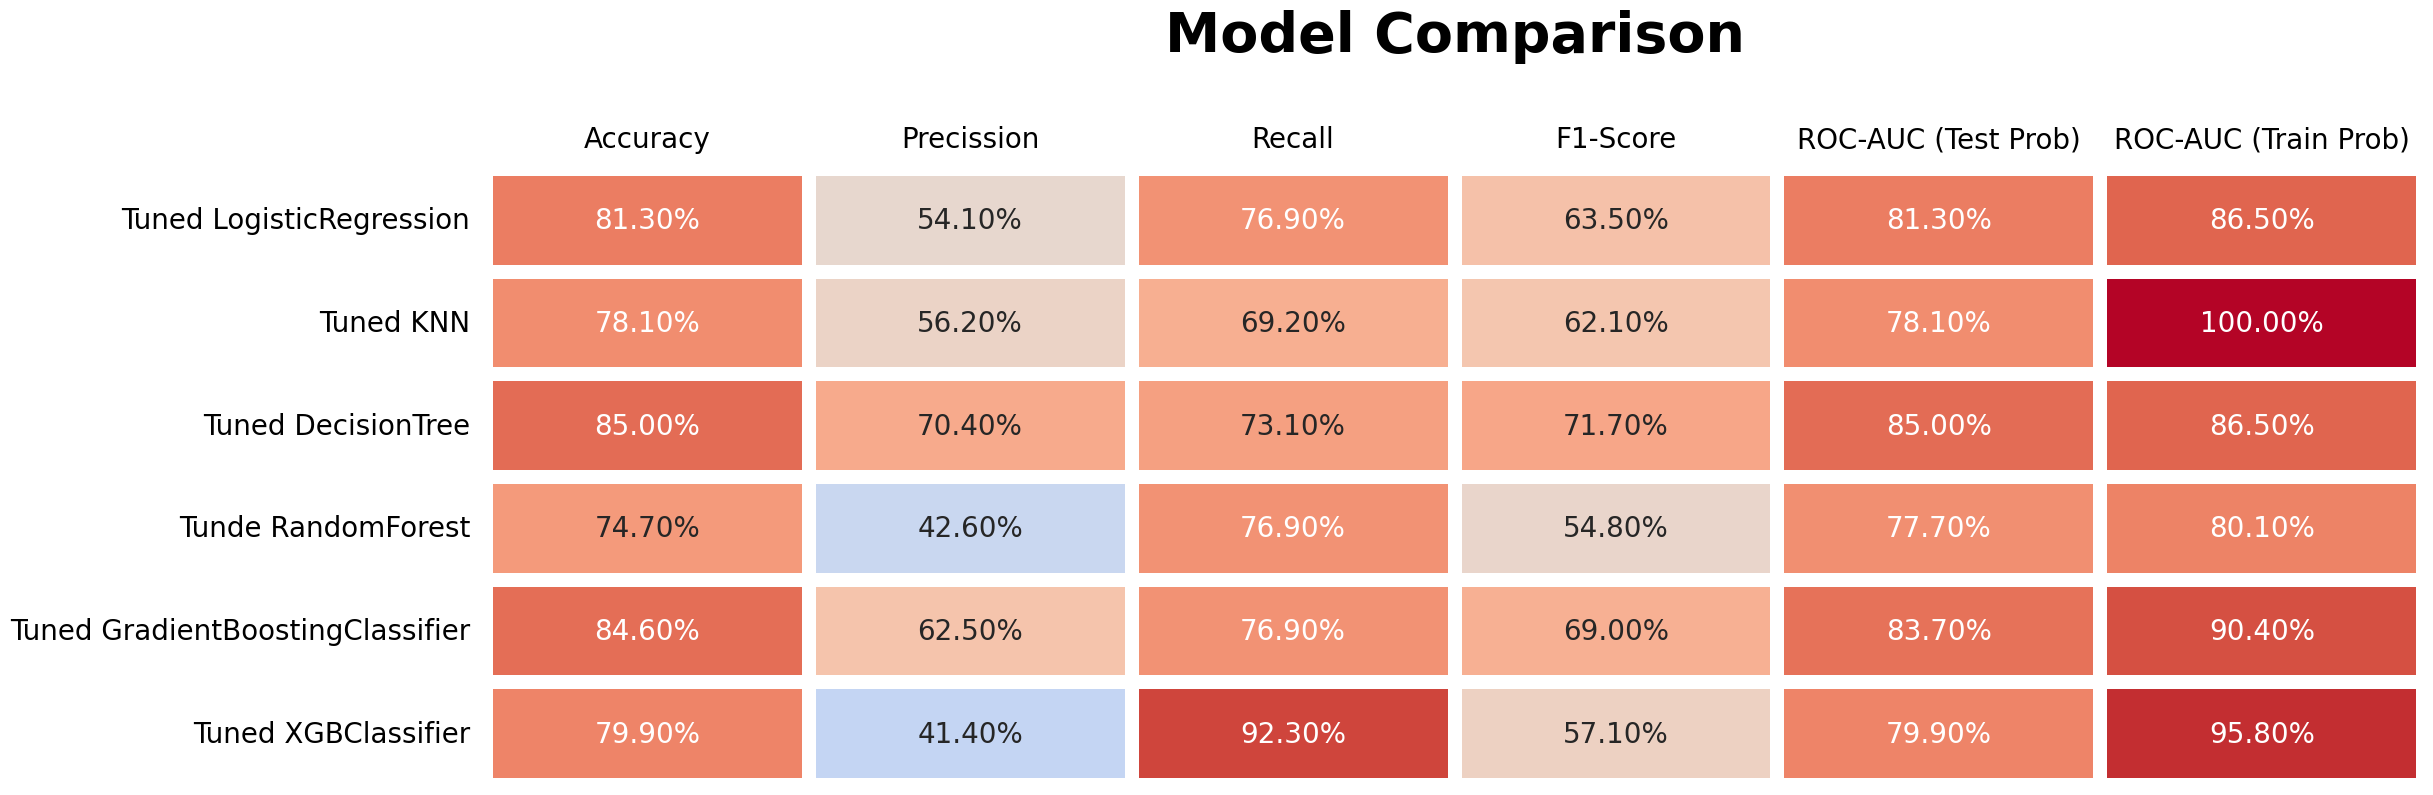

In [116]:
# Comparison
style.use('seaborn-v0_8-poster')
algo = list(df_eval['MLA used'])
fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(df_eval.iloc[:, 1:], annot=True, fmt=".2%", vmin=0, vmax=1,
            linewidths=10, cmap='coolwarm', cbar=False, annot_kws={"fontsize":20},
            yticklabels=algo)
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), size=20)
ax.set_yticklabels(ax.get_yticklabels(), size=20)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_title('Model Comparison\n', weight='bold', fontsize=40)

**Insight:**

Dari hasil beberapa tuning hyperparameter, model yang dipilih merupakan model dengan algoritma Decision Tree karena memiliki performa yang baik dibandingkan model lainnya. Terlihat perbedaan AUC train dan test tidak jauh, sehingga model ini tidak overfitting atau underfitting sedangkan model lainnya masih overfitting. Selain itu, metrik evaluasi seperti akurasi, presisi, recall, dan f1-score juga memiliki nilai yang lebih baik dibandingkan model lainnya.

- AUC Score Train proba: 0.865
- AUC Score Test proba: 0.850
- Train Accuracy Score : 0.796
- Test Accuracy Score : 0.824
- Precision Score Test: 0.704
- Recall Score Test : 0.731
- F1 Score Test : 0.717

##**Feature Importance**

In [117]:
#Evaluation for model
def evaluation(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba_test = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print('AUC Score Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_train,y_pred_proba_train[:,1]),3)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba_test[:,1]),3)}\n')
    print('='*30)

    print('Others Metrics Evaluation:')
    print(f'Train Accuracy Score : {round(accuracy_score(y_train,y_pred_train),3)}')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),3)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),3)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),3)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),3)}\n')
    print('='*30)

    print('**CONFUSION MATRIX**')
    print(confusion_matrix(y_test, model.predict(X_test)))

In [118]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=10, min_samples_leaf=4)
dtc.fit(X_train_over, y_train_over)
evaluation(dtc)

AUC Score Train vs Test:
AUC Score Train proba: 0.951
AUC Score Test proba: 0.841

Others Metrics Evaluation:
Train Accuracy Score : 0.878
Test Accuracy Score : 0.788
Precision Score Test: 0.625
Recall Score Test : 0.769
F1 Score Test : 0.69

**CONFUSION MATRIX**
[[47 12]
 [ 6 20]]


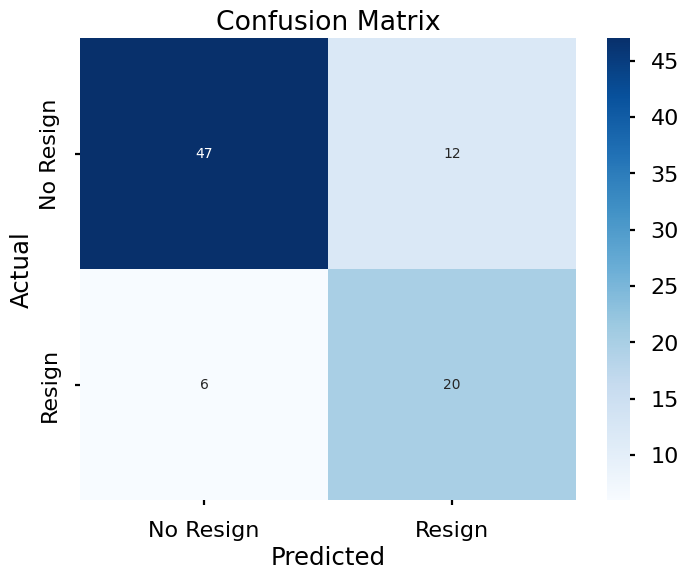

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Membuat prediksi dengan model DecisionTreeClassifier
y_pred = dtc.predict(X_test)

# Menghitung Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat heatmap untuk Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Resign', 'Resign'],
            yticklabels=['No Resign', 'Resign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

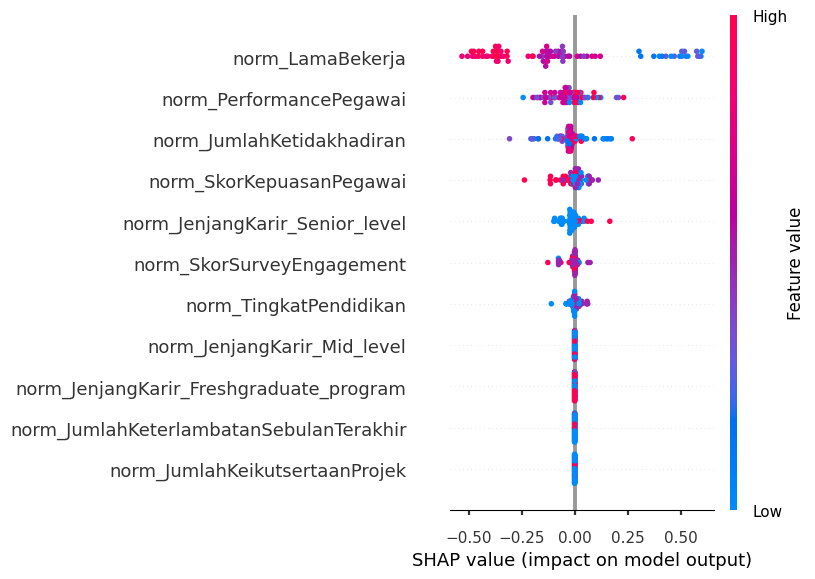

In [120]:
import shap
explainer = shap.TreeExplainer(dtc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

**Force Plot**

In [121]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0,:])

**Insight:**

Terlihat bahwa feature LamaBekerja merupakan feature paling penting dan sangat dominan dibanding feature lainnya dalam memprediksi kemungkinan resign dari suatu karyawan. Adapun data SHAP value menunjukkan bahwa semakin kecil lama bekerja dari suatu karyawan, maka semakin besar kemungkinan karyawan tersebut untuk resign.

In [122]:
X_train_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   norm_SkorSurveyEngagement                272 non-null    float64
 1   norm_SkorKepuasanPegawai                 272 non-null    float64
 2   norm_JumlahKeikutsertaanProjek           272 non-null    float64
 3   norm_JumlahKeterlambatanSebulanTerakhir  272 non-null    float64
 4   norm_JumlahKetidakhadiran                272 non-null    float64
 5   norm_LamaBekerja                         272 non-null    float64
 6   norm_PerformancePegawai                  272 non-null    float64
 7   norm_TingkatPendidikan                   272 non-null    float64
 8   norm_JenjangKarir_Senior_level           272 non-null    float64
 9   norm_JenjangKarir_Freshgraduate_program  272 non-null    float64
 10  norm_JenjangKarir_Mid_level              272 non-n

#**Plot Lama Bekerja**

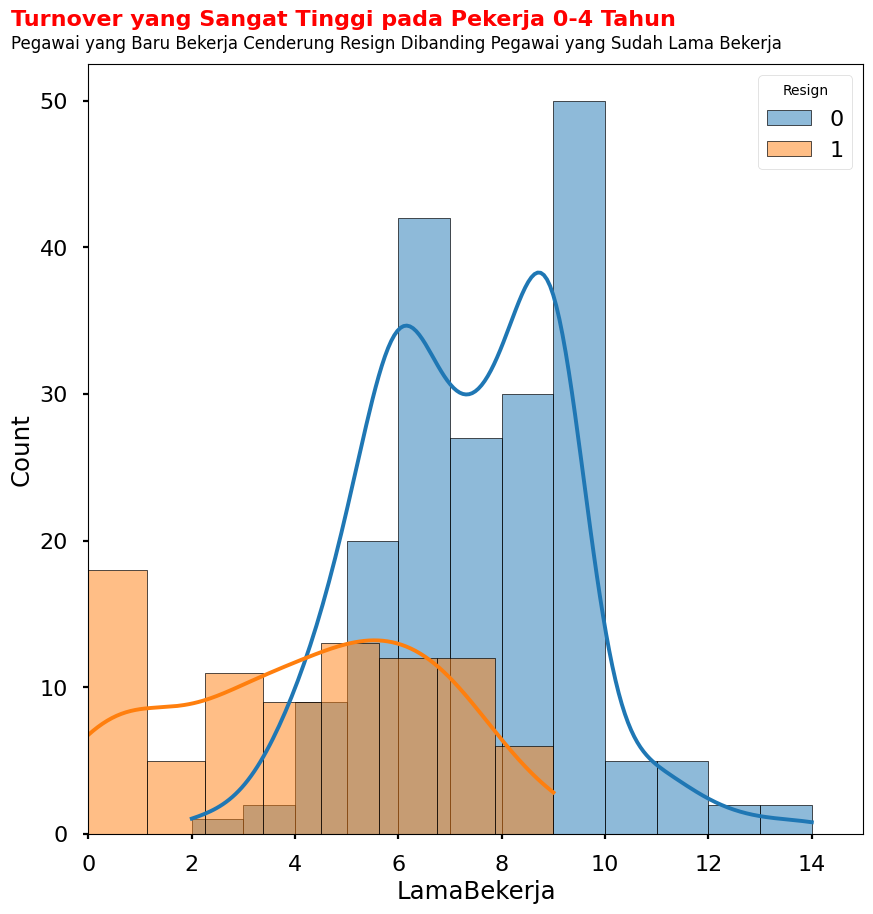

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
for resign_category in df_model['Resign'].unique():
    sns.histplot(df_model[df_model['Resign'] == resign_category]['LamaBekerja'], label=resign_category, kde=True)

# Tambahkan judul
plt.text(-0.1, 1.05, 'Turnover yang Sangat Tinggi pada Pekerja 0-4 Tahun', color='red', fontsize=16, fontweight='bold', transform=plt.gca().transAxes)

# Tambahkan subjudul
plt.text(-0.1, 1.02, 'Pegawai yang Baru Bekerja Cenderung Resign Dibanding Pegawai yang Sudah Lama Bekerja', color='black', fontsize=12, transform=plt.gca().transAxes)

plt.legend(title='Resign')

plt.xlim(0, 15)  # Set the x-axis limits

# Tampilkan diagram
plt.show()

**Observasi:**

Terlihat dari grafik di atas menunjukkan bahwa terdapat turnover yang sangat tinggi pada pegawai yang bekerja 0-4 tahun dimana artinya pegawai baru cenderung resign dibanding pegawai lama.

#**Rekomendasi Bisnis:**

Perusahaan dapat memfokuskan upaya pada perbaikan program onboarding untuk memastikan pegawai baru merasa diterima dan siap secara keterampilan untuk menghindari lingkungan kerja yang toksik dan mengurangi tingkat turnover yang tinggi pada pegawai baru. Sediakan mentorship yang membantu mereka beradaptasi dengan lingkungan perusahaan. Bangun budaya kerja yang kolaboratif dan berdayakan, serta prioritaskan keseimbangan kerja-hidup. Fasilitasi komunikasi terbuka, akui kontribusi pegawai secara teratur. Terakhir, tangani masalah dengan cepat dan adil untuk menciptakan lingkungan kerja yang sehat dan berkelanjutan.